# SPE DATATHON

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier


In [2]:
# Load and preprocess data
wells_data = pd.read_csv('data/spe_africa_dseats_datathon_2025_wells_dataset.csv')
reservoir_info = pd.read_csv('data/reservoir_info.csv')
classification_params = pd.read_csv('data/classification_parameters.csv')

In [3]:
print("\n=== DATASET OVERVIEW ===")
print(f"Wells data shape: {wells_data.shape}")
print(f"Reservoir info shape: {reservoir_info.shape}")
print(f"Classification params shape: {classification_params.shape}")



=== DATASET OVERVIEW ===
Wells data shape: (7955, 13)
Reservoir info shape: (5, 6)
Classification params shape: (5, 7)


SPE DSEATS Africa Datathon 2025
Loading datasets...
✓ Wells dataset: 7955 rows, 13 columns
✓ Reservoir info: 5 rows, 6 columns
✓ Classification parameters: 5 rows, 7 columns

Cleaning numerical data...
✓ Cleaned BOTTOMHOLE_FLOWING_PRESSURE (PSI)
✓ Cleaned ANNULUS_PRESS (PSI)
✓ Cleaned WELL_HEAD_PRESSURE (PSI)
✓ Cleaned CUMULATIVE_OIL_PROD (STB)
✓ Cleaned CUMULATIVE_FORMATION_GAS_PROD (MSCF)
✓ Cleaned CUMULATIVE_TOTAL_GAS_PROD (MSCF)
✓ Cleaned CUMULATIVE_WATER_PROD (BBL)
✓ Converted PROD_DATE to datetime

✓ Data cleaning completed!
Wells dataset shape after cleaning: (7955, 13)

Calculating production features...
✓ Daily production rates calculated
✓ GOR calculated
✓ Water cut calculated
✓ Days on production calculated

STARTING COMPREHENSIVE EDA

Generating well overview plots...


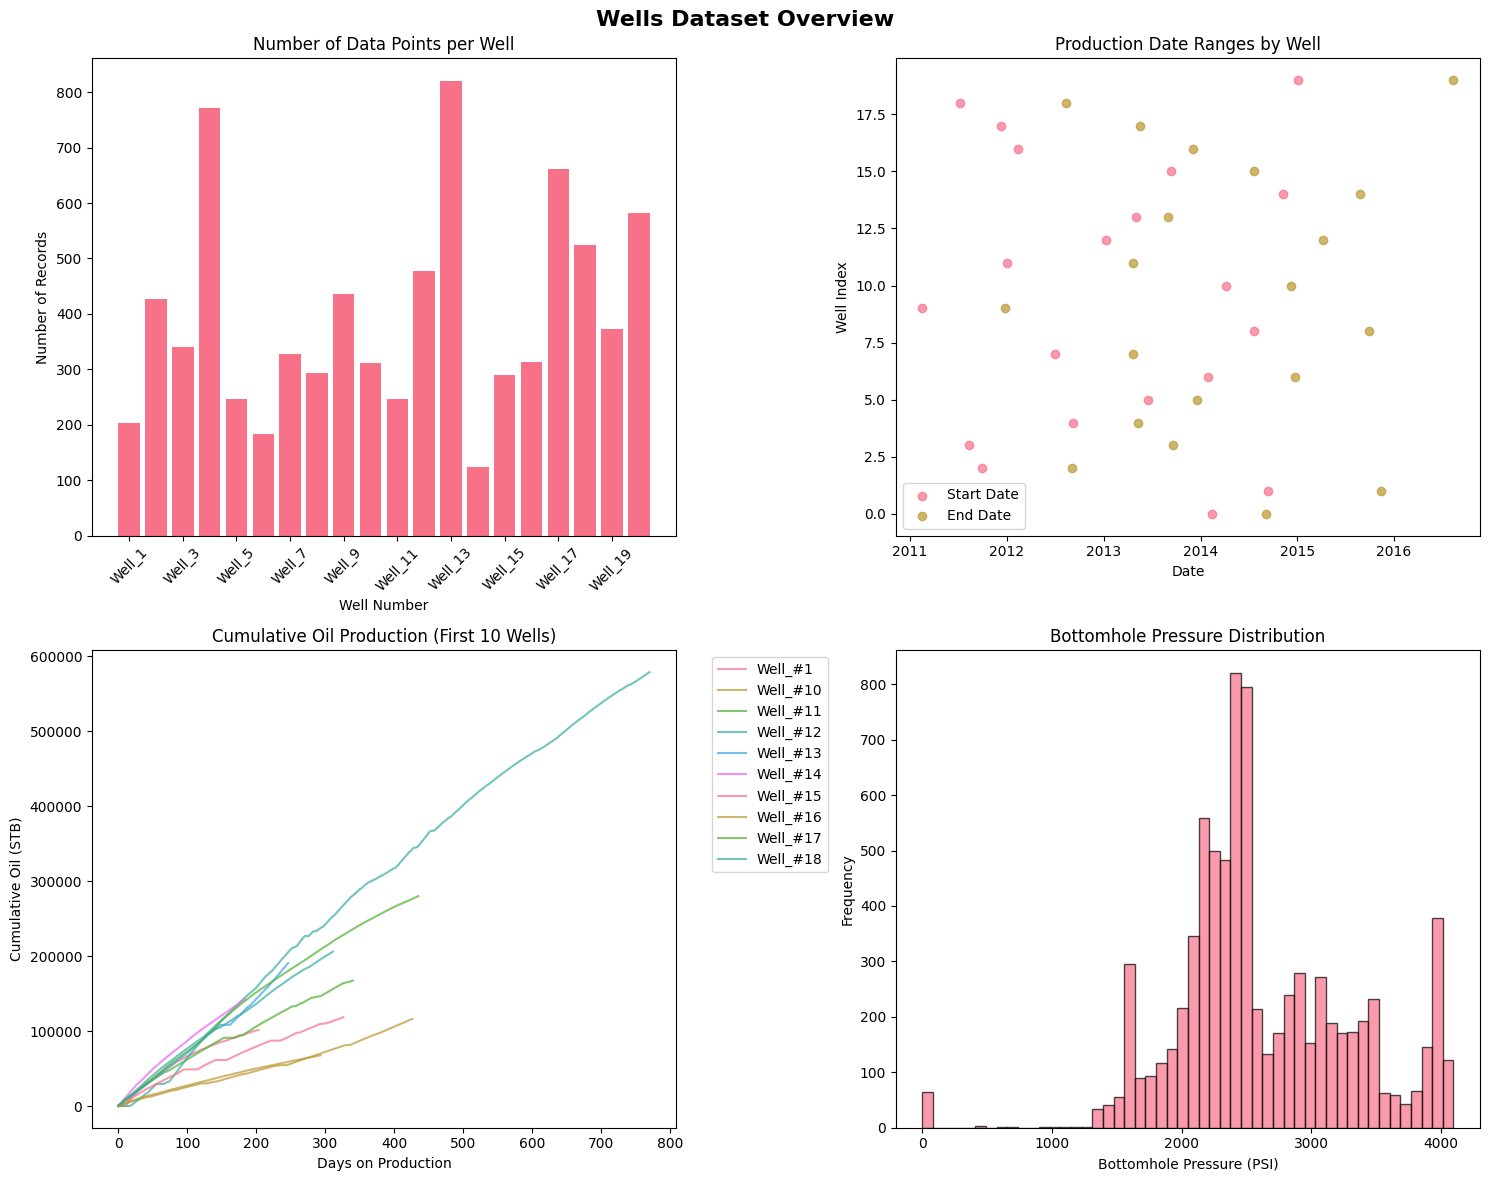

Generating reservoir characteristics plot...


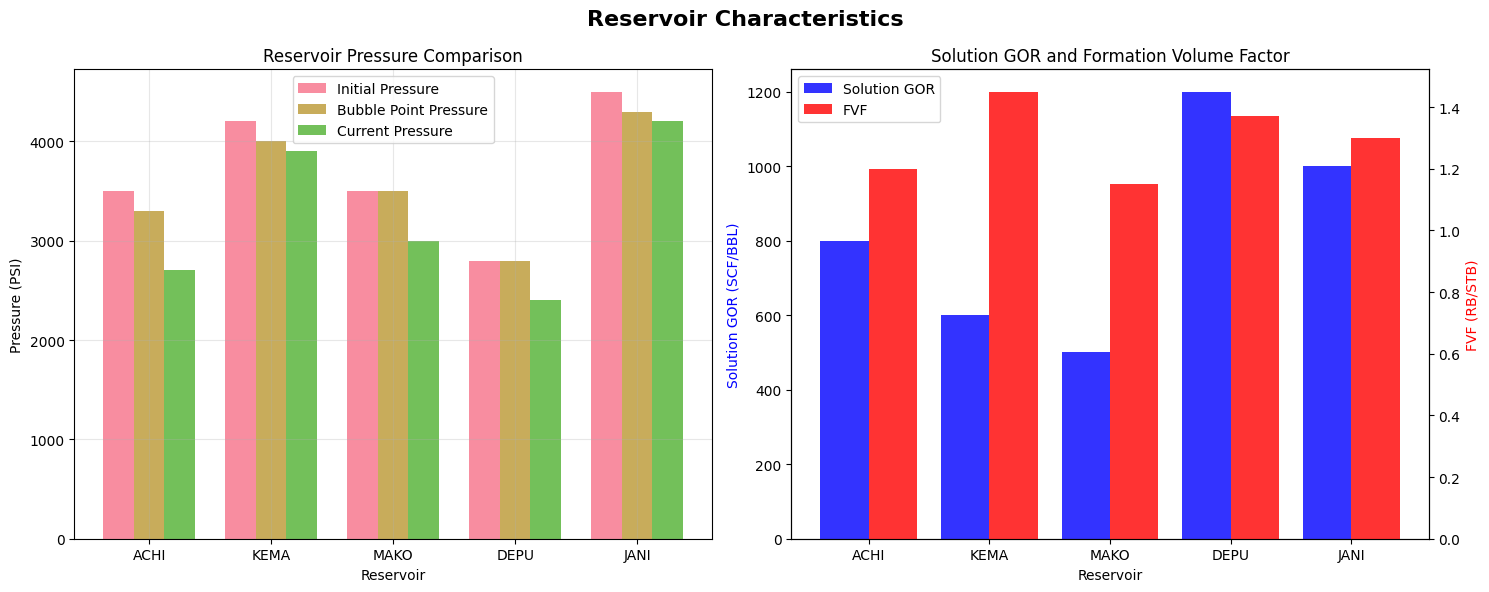


Analyzing well types (Natural Flow vs Gas Lift)...
Natural Flow Wells (10): ['Well_#12', 'Well_#13', 'Well_#14', 'Well_#15', 'Well_#16', 'Well_#18', 'Well_#19', 'Well_#2', 'Well_#5', 'Well_#6']
Gas Lift Wells (10): ['Well_#1', 'Well_#10', 'Well_#11', 'Well_#17', 'Well_#20', 'Well_#3', 'Well_#4', 'Well_#7', 'Well_#8', 'Well_#9']


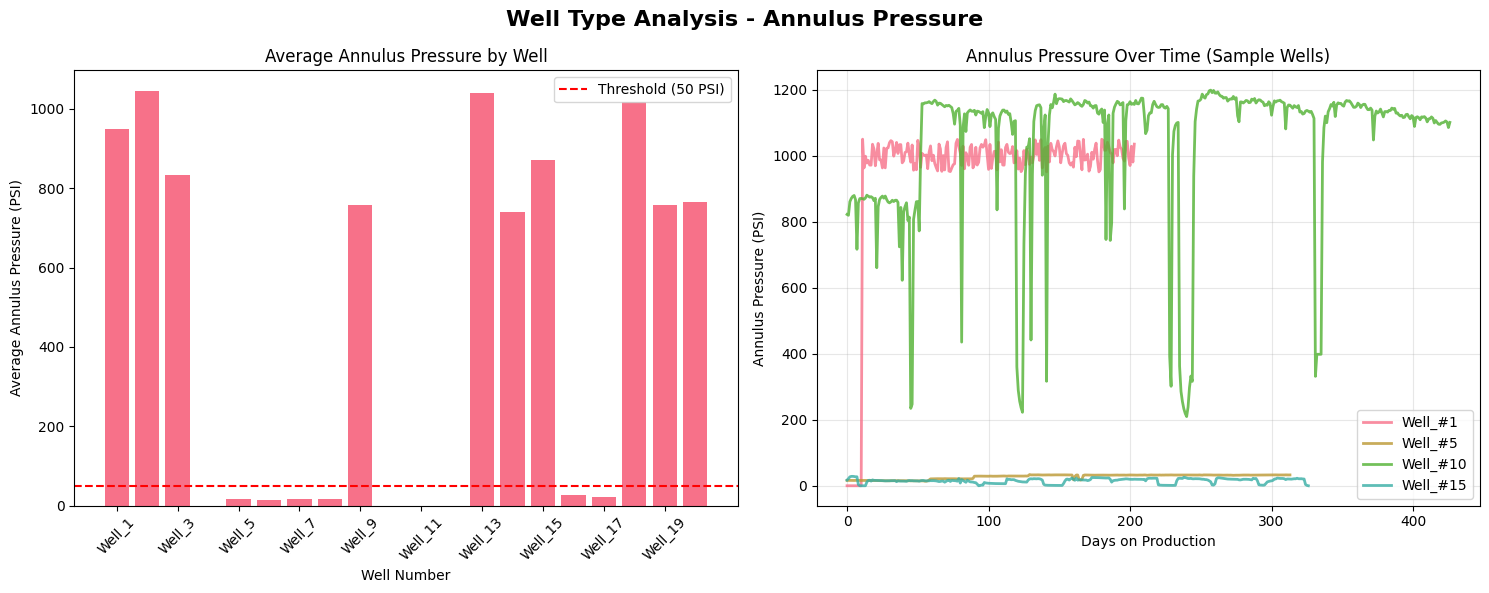

Generating production trend analysis...


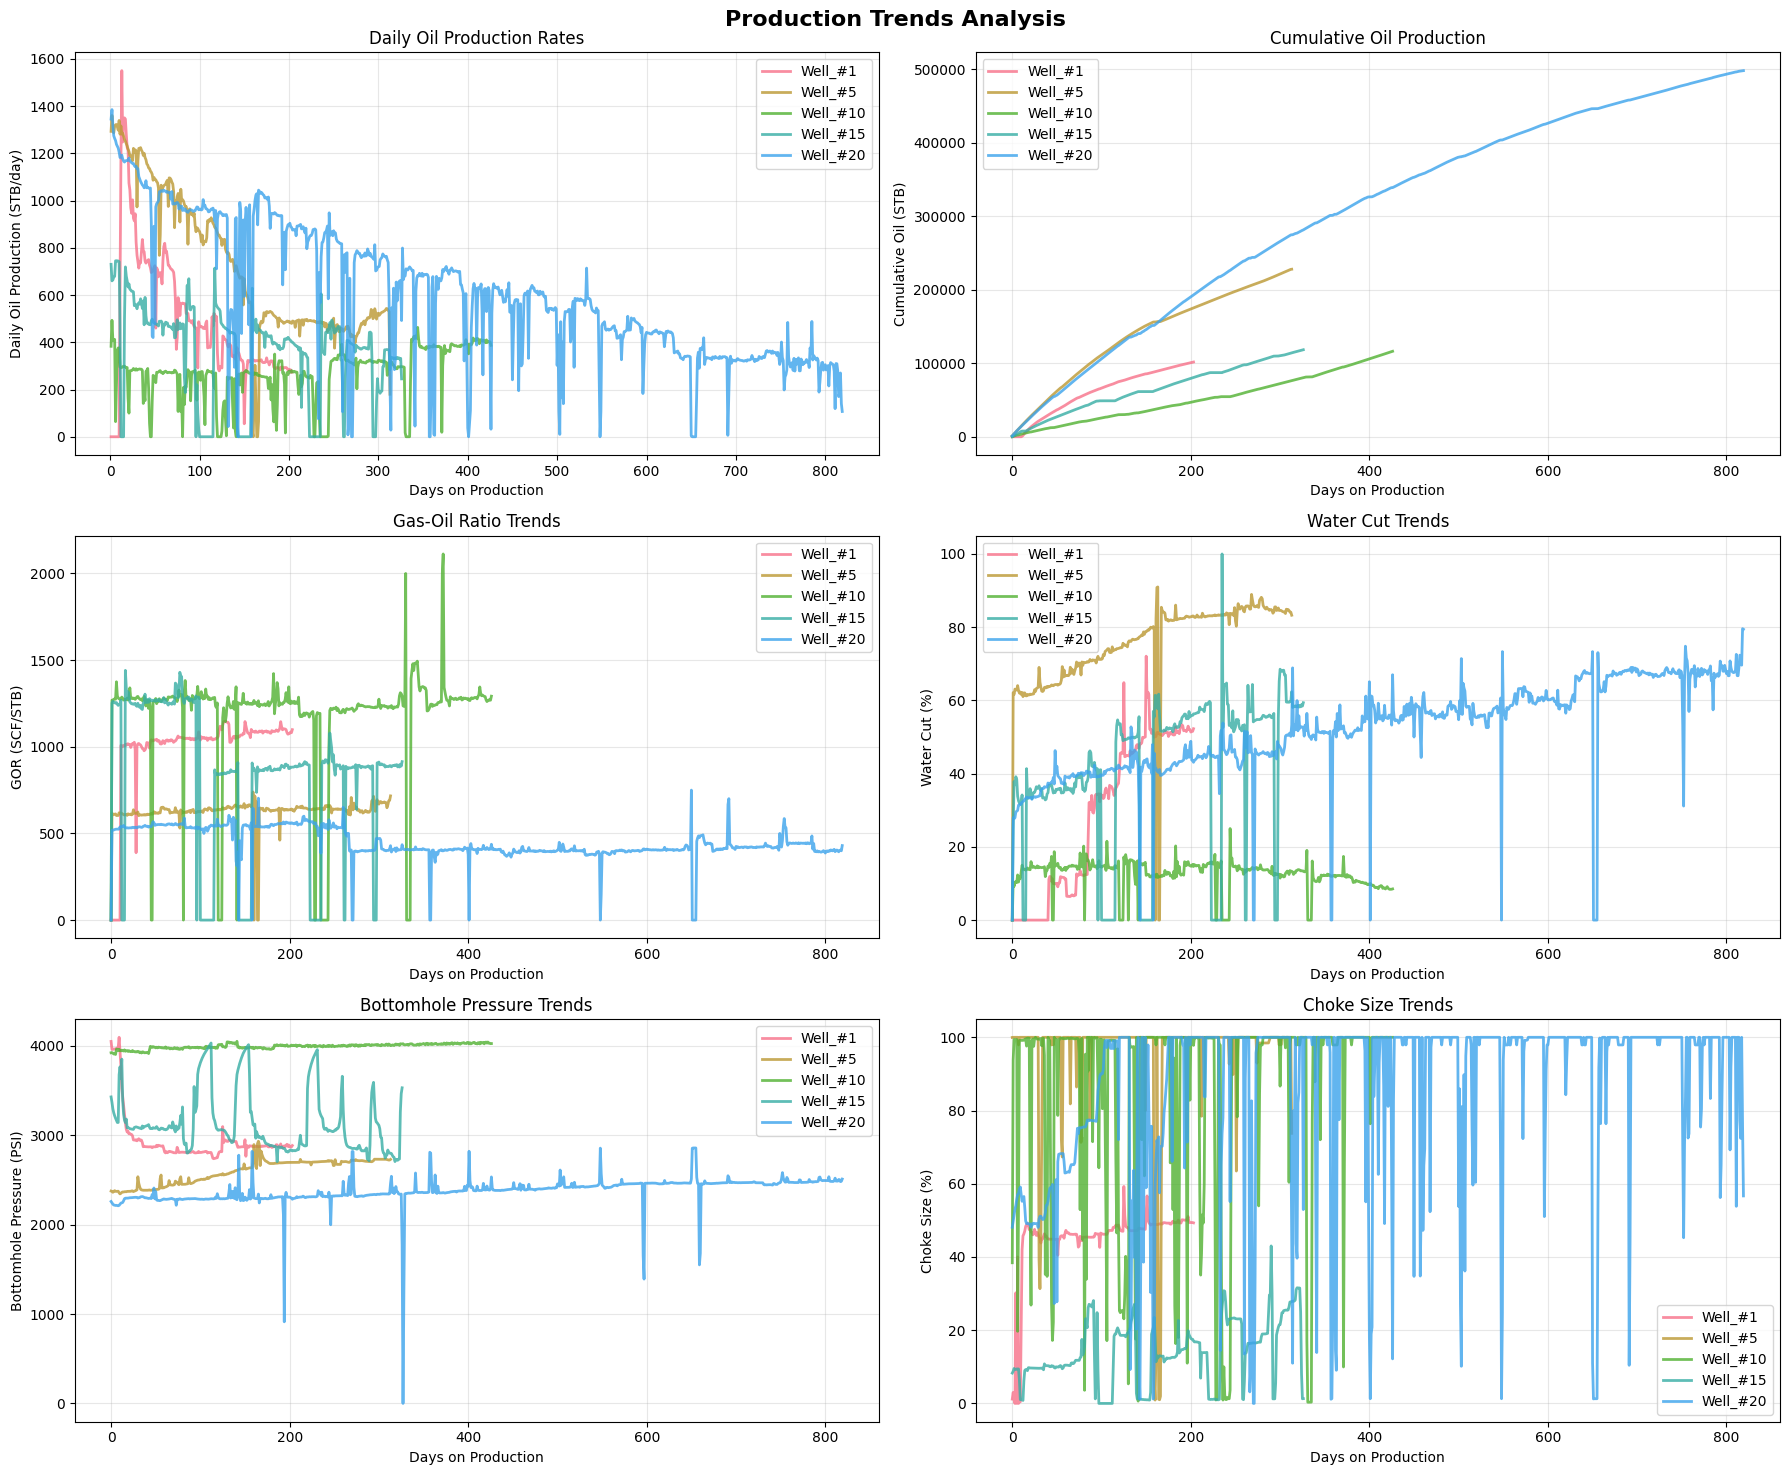


SUMMARY STATISTICS

1. WELLS DATASET SUMMARY:
   • Total wells: 20
   • Total records: 7,955
   • Date range: 17-Feb-2011 to 12-Aug-2016
   • Average records per well: 398

2. TOTAL FIELD PRODUCTION:
   • Total oil: 5,638,736 STB
   • Total gas: 5,337,394 MSCF
   • Total water: 5,346,596 BBL

3. PRESSURE RANGES:
   • Bottomhole pressure: 0 - 4096 PSI
   • Average bottomhole pressure: 2614 PSI
   • Wellhead pressure: 0 - 1788 PSI

4. TOP 5 OIL PRODUCING WELLS:
   1. Well_#6: 1,129,301 STB
   2. Well_#7: 589,385 STB
   3. Well_#12: 578,776 STB
   4. Well_#20: 498,126 STB
   5. Well_#4: 385,817 STB

EDA COMPLETED SUCCESSFULLY!

✓ Cleaned data saved to 'cleaned_wells_data.csv'
✓ Dataset ready for machine learning model development!

FINAL DATASET INFO:
Shape: (7955, 19)
Columns: ['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE (PSI)', 'DOWNHOLE_TEMPERATURE (deg F)', 'ANNULUS_PRESS (PSI)', 'CHOKE_SIZE (%)', 'WELL_HEAD_PRESSURE (PSI)', 'WELL_HEAD_TEMPERATURE (deg F)'

In [ ]:
# SPE DSEATS Africa Datathon 2025 - Data Cleaning & EDA
# Team: [Your Team Name]
# Members: [Add team member names and SPE numbers]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("SPE DSEATS Africa Datathon 2025")
print("="*50)

# =============================================================================
# 1. DATA LOADING
# =============================================================================

def load_datasets():
    """Load all three datasets"""
    print("Loading datasets...")
    
    # Load wells dataset
    wells_df = pd.read_csv('data/spe_africa_dseats_datathon_2025_wells_dataset.csv')
    
    # Load reservoir info
    reservoir_df = pd.read_csv('data/reservoir_info.csv')
    
    # Load classification parameters
    classification_df = pd.read_csv('data/classification_parameters.csv')
    
    print(f" Wells dataset: {wells_df.shape[0]} rows, {wells_df.shape[1]} columns")
    print(f" Reservoir info: {reservoir_df.shape[0]} rows, {reservoir_df.shape[1]} columns")
    print(f" Classification parameters: {classification_df.shape[0]} rows, {classification_df.shape[1]} columns")
    
    return wells_df, reservoir_df, classification_df

# Load the data
wells_df, reservoir_df, classification_df = load_datasets()

# =============================================================================
# 2. DATA CLEANING
# =============================================================================

def clean_numerical_columns(df):
    """Clean numerical columns with commas and convert data types"""
    print("\nCleaning numerical data...")
    
    # Create a copy to avoid modifying original
    df_clean = df.copy()
    
    # Columns that need comma removal and conversion to numeric
    pressure_cols = [
        'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
        'ANNULUS_PRESS (PSI)', 
        'WELL_HEAD_PRESSURE (PSI)'
    ]
    
    production_cols = [
        'CUMULATIVE_OIL_PROD (STB)',
        'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
        'CUMULATIVE_TOTAL_GAS_PROD (MSCF)',
        'CUMULATIVE_WATER_PROD (BBL)'
    ]
    
    # Clean pressure columns
    for col in pressure_cols:
        if col in df_clean.columns:
            # Remove commas and convert to numeric
            df_clean[col] = df_clean[col].astype(str).str.replace(',', '').str.replace(' ', '')
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
            print(f" Cleaned {col}")
    
    # Clean production columns
    for col in production_cols:
        if col in df_clean.columns:
            # Remove commas and convert to numeric
            df_clean[col] = df_clean[col].astype(str).str.replace(',', '').str.replace(' ', '')
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
            print(f" Cleaned {col}")
    
    # Convert date column
    df_clean['PROD_DATE'] = pd.to_datetime(df_clean['PROD_DATE'], format='%d-%b-%y')
    print(" Converted PROD_DATE to datetime")
    
    return df_clean

def clean_reservoir_data(df):
    """Clean reservoir dataset"""
    df_clean = df.copy()
    
    # Clean pressure columns in reservoir data
    pressure_cols = [
        'Initial Reservoir Pressure (PSI)',
        'Bubble Point Pressure (PSI)', 
        'Current Average Reservoir Pressure (PSI)',
        'Solution Gas-Oil-Ratio (SCF/BBL)'
    ]
    
    for col in pressure_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(str).str.replace(',', '').str.replace(' ', '')
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    return df_clean

# Apply cleaning
wells_clean = clean_numerical_columns(wells_df)
reservoir_clean = clean_reservoir_data(reservoir_df)

print(f"\n Data cleaning completed!")
print(f"Wells dataset shape after cleaning: {wells_clean.shape}")

# =============================================================================
# 3. FEATURE ENGINEERING
# =============================================================================

def calculate_production_features(df):
    """Calculate daily production rates and other derived features"""
    print("\nCalculating production features...")
    
    df_features = df.copy()
    
    # Sort by well and date
    df_features = df_features.sort_values(['WELL_NAME', 'PROD_DATE'])
    
    # Calculate daily production rates for each well
    for well in df_features['WELL_NAME'].unique():
        well_mask = df_features['WELL_NAME'] == well
        well_data = df_features[well_mask].copy()
        
        # Calculate daily rates from cumulative production
        df_features.loc[well_mask, 'DAILY_OIL_PROD'] = well_data['CUMULATIVE_OIL_PROD (STB)'].diff()
        df_features.loc[well_mask, 'DAILY_GAS_PROD'] = well_data['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'].diff()
        df_features.loc[well_mask, 'DAILY_WATER_PROD'] = well_data['CUMULATIVE_WATER_PROD (BBL)'].diff()
    
    # Set negative daily production to 0 (can happen due to data issues)
    df_features['DAILY_OIL_PROD'] = df_features['DAILY_OIL_PROD'].clip(lower=0)
    df_features['DAILY_GAS_PROD'] = df_features['DAILY_GAS_PROD'].clip(lower=0)
    df_features['DAILY_WATER_PROD'] = df_features['DAILY_WATER_PROD'].clip(lower=0)
    
    # Calculate GOR (Gas-Oil Ratio) - avoid division by zero
    df_features['GOR'] = np.where(
        df_features['DAILY_OIL_PROD'] > 0,
        (df_features['DAILY_GAS_PROD'] * 1000) / df_features['DAILY_OIL_PROD'],  # Convert MSCF to SCF
        0
    )
    
    # Calculate Water Cut
    total_liquid = df_features['DAILY_OIL_PROD'] + df_features['DAILY_WATER_PROD']
    df_features['WATER_CUT'] = np.where(
        total_liquid > 0,
        df_features['DAILY_WATER_PROD'] / total_liquid * 100,
        0
    )
    
    # Calculate days on production
    df_features['DAYS_ON_PROD'] = df_features.groupby('WELL_NAME')['PROD_DATE'].transform(
        lambda x: (x - x.min()).dt.days
    )
    
    print(" Daily production rates calculated")
    print(" GOR calculated")
    print(" Water cut calculated")
    print(" Days on production calculated")
    
    return df_features

# Calculate features
wells_with_features = calculate_production_features(wells_clean)

# =============================================================================
# 4. EXPLORATORY DATA ANALYSIS
# =============================================================================

def plot_well_overview():
    """Create overview plots of all wells"""
    print("\nGenerating well overview plots...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Wells Dataset Overview', fontsize=16, fontweight='bold')
    
    # Plot 1: Wells count and data points
    well_counts = wells_with_features['WELL_NAME'].value_counts().sort_index()
    axes[0,0].bar(range(len(well_counts)), well_counts.values)
    axes[0,0].set_title('Number of Data Points per Well')
    axes[0,0].set_xlabel('Well Number')
    axes[0,0].set_ylabel('Number of Records')
    axes[0,0].set_xticks(range(0, 20, 2))
    axes[0,0].set_xticklabels([f'Well_{i+1}' for i in range(0, 20, 2)], rotation=45)
    
    # Plot 2: Production date ranges
    date_ranges = wells_with_features.groupby('WELL_NAME')['PROD_DATE'].agg(['min', 'max'])
    axes[0,1].scatter(date_ranges['min'], range(len(date_ranges)), alpha=0.7, label='Start Date')
    axes[0,1].scatter(date_ranges['max'], range(len(date_ranges)), alpha=0.7, label='End Date')
    axes[0,1].set_title('Production Date Ranges by Well')
    axes[0,1].set_xlabel('Date')
    axes[0,1].set_ylabel('Well Index')
    axes[0,1].legend()
    
    # Plot 3: Cumulative oil production by well
    for well in wells_with_features['WELL_NAME'].unique()[:10]:  # Show first 10 wells
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        axes[1,0].plot(well_data['DAYS_ON_PROD'], well_data['CUMULATIVE_OIL_PROD (STB)'], 
                      alpha=0.7, label=well)
    axes[1,0].set_title('Cumulative Oil Production (First 10 Wells)')
    axes[1,0].set_xlabel('Days on Production')
    axes[1,0].set_ylabel('Cumulative Oil (STB)')
    axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot 4: Pressure distribution
    pressure_data = wells_with_features['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].dropna()
    axes[1,1].hist(pressure_data, bins=50, alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Bottomhole Pressure Distribution')
    axes[1,1].set_xlabel('Bottomhole Pressure (PSI)')
    axes[1,1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def plot_reservoir_characteristics():
    """Plot reservoir characteristics"""
    print("Generating reservoir characteristics plot...")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Reservoir Characteristics', fontsize=16, fontweight='bold')
    
    # Plot 1: Pressure comparison
    reservoirs = reservoir_clean['Reservoir Name']
    initial_p = reservoir_clean['Initial Reservoir Pressure (PSI)']
    bubble_p = reservoir_clean['Bubble Point Pressure (PSI)']
    current_p = reservoir_clean['Current Average Reservoir Pressure (PSI)']
    
    x = range(len(reservoirs))
    width = 0.25
    
    axes[0].bar([i - width for i in x], initial_p, width, label='Initial Pressure', alpha=0.8)
    axes[0].bar([i for i in x], bubble_p, width, label='Bubble Point Pressure', alpha=0.8)
    axes[0].bar([i + width for i in x], current_p, width, label='Current Pressure', alpha=0.8)
    
    axes[0].set_title('Reservoir Pressure Comparison')
    axes[0].set_xlabel('Reservoir')
    axes[0].set_ylabel('Pressure (PSI)')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(reservoirs)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Solution GOR and FVF
    sol_gor = reservoir_clean['Solution Gas-Oil-Ratio (SCF/BBL)']
    fvf = reservoir_clean['Formation Volume Factor (RB/STB)']
    
    ax2 = axes[1]
    ax2_twin = ax2.twinx()
    
    bars1 = ax2.bar([i - 0.2 for i in x], sol_gor, 0.4, label='Solution GOR', alpha=0.8, color='blue')
    bars2 = ax2_twin.bar([i + 0.2 for i in x], fvf, 0.4, label='FVF', alpha=0.8, color='red')
    
    ax2.set_title('Solution GOR and Formation Volume Factor')
    ax2.set_xlabel('Reservoir')
    ax2.set_ylabel('Solution GOR (SCF/BBL)', color='blue')
    ax2_twin.set_ylabel('FVF (RB/STB)', color='red')
    ax2.set_xticks(x)
    ax2.set_xticklabels(reservoirs)
    
    # Combine legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()

def analyze_well_types():
    """Analyze well types based on annulus pressure"""
    print("\nAnalyzing well types (Natural Flow vs Gas Lift)...")
    
    # Calculate average annulus pressure per well
    well_avg_annulus = wells_with_features.groupby('WELL_NAME')['ANNULUS_PRESS (PSI)'].mean()
    
    # Classify wells
    natural_flow_wells = well_avg_annulus[well_avg_annulus <= 50].index.tolist()  # Allow small pressure
    gas_lift_wells = well_avg_annulus[well_avg_annulus > 50].index.tolist()
    
    print(f"Natural Flow Wells ({len(natural_flow_wells)}): {natural_flow_wells}")
    print(f"Gas Lift Wells ({len(gas_lift_wells)}): {gas_lift_wells}")
    
    # Plot annulus pressure distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Well Type Analysis - Annulus Pressure', fontsize=16, fontweight='bold')
    
    # Plot 1: Average annulus pressure by well
    axes[0].bar(range(len(well_avg_annulus)), well_avg_annulus.values)
    axes[0].set_title('Average Annulus Pressure by Well')
    axes[0].set_xlabel('Well Number')
    axes[0].set_ylabel('Average Annulus Pressure (PSI)')
    axes[0].set_xticks(range(0, 20, 2))
    axes[0].set_xticklabels([f'Well_{i+1}' for i in range(0, 20, 2)], rotation=45)
    axes[0].axhline(y=50, color='red', linestyle='--', label='Threshold (50 PSI)')
    axes[0].legend()
    
    # Plot 2: Annulus pressure time series for sample wells
    sample_wells = ['Well_#1', 'Well_#5', 'Well_#10', 'Well_#15']
    for well in sample_wells:
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        axes[1].plot(well_data['DAYS_ON_PROD'], well_data['ANNULUS_PRESS (PSI)'], 
                    alpha=0.8, label=well, linewidth=2)
    
    axes[1].set_title('Annulus Pressure Over Time (Sample Wells)')
    axes[1].set_xlabel('Days on Production')
    axes[1].set_ylabel('Annulus Pressure (PSI)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return natural_flow_wells, gas_lift_wells

def plot_production_trends():
    """Plot detailed production trends"""
    print("Generating production trend analysis...")
    
    # Select representative wells for detailed analysis
    sample_wells = ['Well_#1', 'Well_#5', 'Well_#10', 'Well_#15', 'Well_#20']
    
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    fig.suptitle('Production Trends Analysis', fontsize=16, fontweight='bold')
    
    # Plot 1: Daily oil production rates
    for well in sample_wells:
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        axes[0,0].plot(well_data['DAYS_ON_PROD'], well_data['DAILY_OIL_PROD'], 
                      alpha=0.8, label=well, linewidth=2)
    axes[0,0].set_title('Daily Oil Production Rates')
    axes[0,0].set_xlabel('Days on Production')
    axes[0,0].set_ylabel('Daily Oil Production (STB/day)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: Cumulative oil production
    for well in sample_wells:
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        axes[0,1].plot(well_data['DAYS_ON_PROD'], well_data['CUMULATIVE_OIL_PROD (STB)'], 
                      alpha=0.8, label=well, linewidth=2)
    axes[0,1].set_title('Cumulative Oil Production')
    axes[0,1].set_xlabel('Days on Production')
    axes[0,1].set_ylabel('Cumulative Oil (STB)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: GOR trends
    for well in sample_wells:
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        # Filter out extreme GOR values for better visualization
        gor_filtered = well_data[well_data['GOR'] < 5000]
        if len(gor_filtered) > 0:
            axes[1,0].plot(gor_filtered['DAYS_ON_PROD'], gor_filtered['GOR'], 
                          alpha=0.8, label=well, linewidth=2)
    axes[1,0].set_title('Gas-Oil Ratio Trends')
    axes[1,0].set_xlabel('Days on Production')
    axes[1,0].set_ylabel('GOR (SCF/STB)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Water cut trends
    for well in sample_wells:
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        axes[1,1].plot(well_data['DAYS_ON_PROD'], well_data['WATER_CUT'], 
                      alpha=0.8, label=well, linewidth=2)
    axes[1,1].set_title('Water Cut Trends')
    axes[1,1].set_xlabel('Days on Production')
    axes[1,1].set_ylabel('Water Cut (%)')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    # Plot 5: Bottomhole pressure trends
    for well in sample_wells:
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        axes[2,0].plot(well_data['DAYS_ON_PROD'], well_data['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'], 
                      alpha=0.8, label=well, linewidth=2)
    axes[2,0].set_title('Bottomhole Pressure Trends')
    axes[2,0].set_xlabel('Days on Production')
    axes[2,0].set_ylabel('Bottomhole Pressure (PSI)')
    axes[2,0].legend()
    axes[2,0].grid(True, alpha=0.3)
    
    # Plot 6: Choke size trends
    for well in sample_wells:
        well_data = wells_with_features[wells_with_features['WELL_NAME'] == well]
        axes[2,1].plot(well_data['DAYS_ON_PROD'], well_data['CHOKE_SIZE (%)'], 
                      alpha=0.8, label=well, linewidth=2)
    axes[2,1].set_title('Choke Size Trends')
    axes[2,1].set_xlabel('Days on Production')
    axes[2,1].set_ylabel('Choke Size (%)')
    axes[2,1].legend()
    axes[2,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# =============================================================================
# 5. SUMMARY STATISTICS
# =============================================================================

def generate_summary_stats():
    """Generate comprehensive summary statistics"""
    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)
    
    # Wells summary
    print("\n1. WELLS DATASET SUMMARY:")
    print(f"   • Total wells: {wells_with_features['WELL_NAME'].nunique()}")
    print(f"   • Total records: {len(wells_with_features):,}")
    print(f"   • Date range: {wells_with_features['PROD_DATE'].min().strftime('%d-%b-%Y')} to {wells_with_features['PROD_DATE'].max().strftime('%d-%b-%Y')}")
    print(f"   • Average records per well: {len(wells_with_features) / wells_with_features['WELL_NAME'].nunique():.0f}")
    
    # Production summary
    total_oil = wells_with_features.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD (STB)'].max().sum()
    total_gas = wells_with_features.groupby('WELL_NAME')['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'].max().sum()
    total_water = wells_with_features.groupby('WELL_NAME')['CUMULATIVE_WATER_PROD (BBL)'].max().sum()
    
    print(f"\n2. TOTAL FIELD PRODUCTION:")
    print(f"   • Total oil: {total_oil:,.0f} STB")
    print(f"   • Total gas: {total_gas:,.0f} MSCF")
    print(f"   • Total water: {total_water:,.0f} BBL")
    
    # Pressure summary
    print(f"\n3. PRESSURE RANGES:")
    bhp_stats = wells_with_features['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].describe()
    print(f"   • Bottomhole pressure: {bhp_stats['min']:.0f} - {bhp_stats['max']:.0f} PSI")
    print(f"   • Average bottomhole pressure: {bhp_stats['mean']:.0f} PSI")
    
    whp_stats = wells_with_features['WELL_HEAD_PRESSURE (PSI)'].describe()
    print(f"   • Wellhead pressure: {whp_stats['min']:.0f} - {whp_stats['max']:.0f} PSI")
    
    # Top producing wells
    well_production = wells_with_features.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD (STB)'].max().sort_values(ascending=False)
    print(f"\n4. TOP 5 OIL PRODUCING WELLS:")
    for i, (well, production) in enumerate(well_production.head().items()):
        print(f"   {i+1}. {well}: {production:,.0f} STB")

# =============================================================================
# 6. RUN ALL ANALYSIS
# =============================================================================

def run_complete_eda():
    """Run complete exploratory data analysis"""
    print("\n" + "="*60)
    print("STARTING COMPREHENSIVE EDA")
    print("="*60)
    
    # Generate all plots
    plot_well_overview()
    plot_reservoir_characteristics()
    nf_wells, gl_wells = analyze_well_types()
    plot_production_trends()
    
    # Generate summary
    generate_summary_stats()
    
    print(f"\n" + "="*60)
    print("EDA COMPLETED SUCCESSFULLY!")
    print("="*60)
    
    return wells_with_features, reservoir_clean, classification_df, nf_wells, gl_wells

# Run the complete analysis
final_data, reservoir_info, classification_params, natural_flow_wells, gas_lift_wells = run_complete_eda()

# Save cleaned data for next steps
final_data.to_csv('cleaned_wells_data.csv', index=False)
print(f"\n Cleaned data saved to 'cleaned_wells_data.csv'")
print(f" Dataset ready for machine learning model development!")

# Display data info for verification
print(f"\nFINAL DATASET INFO:")
print(f"Shape: {final_data.shape}")
print(f"Columns: {list(final_data.columns)}")
print(f"Missing values per column:")
print(final_data.isnull().sum()[final_data.isnull().sum() > 0])

SPE DSEATS Africa Datathon 2025 - ML Model Development

STARTING ML MODEL DEVELOPMENT PIPELINE
Loading cleaned data...
 Data loaded: 7955 rows, 19 columns

Creating advanced ML features...
 Advanced features created
  - Time features: YEAR, MONTH, QUARTER, DAY_OF_YEAR
  - Lag features: 1-day and 7-day lags for key variables
  - Rolling averages: 7-day and 30-day windows
  - Rate of change features
  - Performance indicators

 Training multiple ML models...

TASK 1: DAILY OIL PRODUCTION FORECASTING
Features shape: (7355, 54)
Target shape: (7355,)

Training Random Forest...
  RMSE: 42.58
  MAE: 16.63
  R²: 0.9969

Training XGBoost...
  RMSE: 37.19
  MAE: 16.63
  R²: 0.9977

Training Gradient Boosting...
  RMSE: 39.93
  MAE: 22.65
  R²: 0.9973

Training Ridge Regression...
  RMSE: 42.65
  MAE: 22.79
  R²: 0.9969

Training Linear Regression...
  RMSE: 42.47
  MAE: 22.57
  R²: 0.9969

 Best Model: XGBoost (R² = 0.9977)

TASK 2: BOTTOMHOLE PRESSURE DECLINE MODELING
Features shape: (7355, 54)

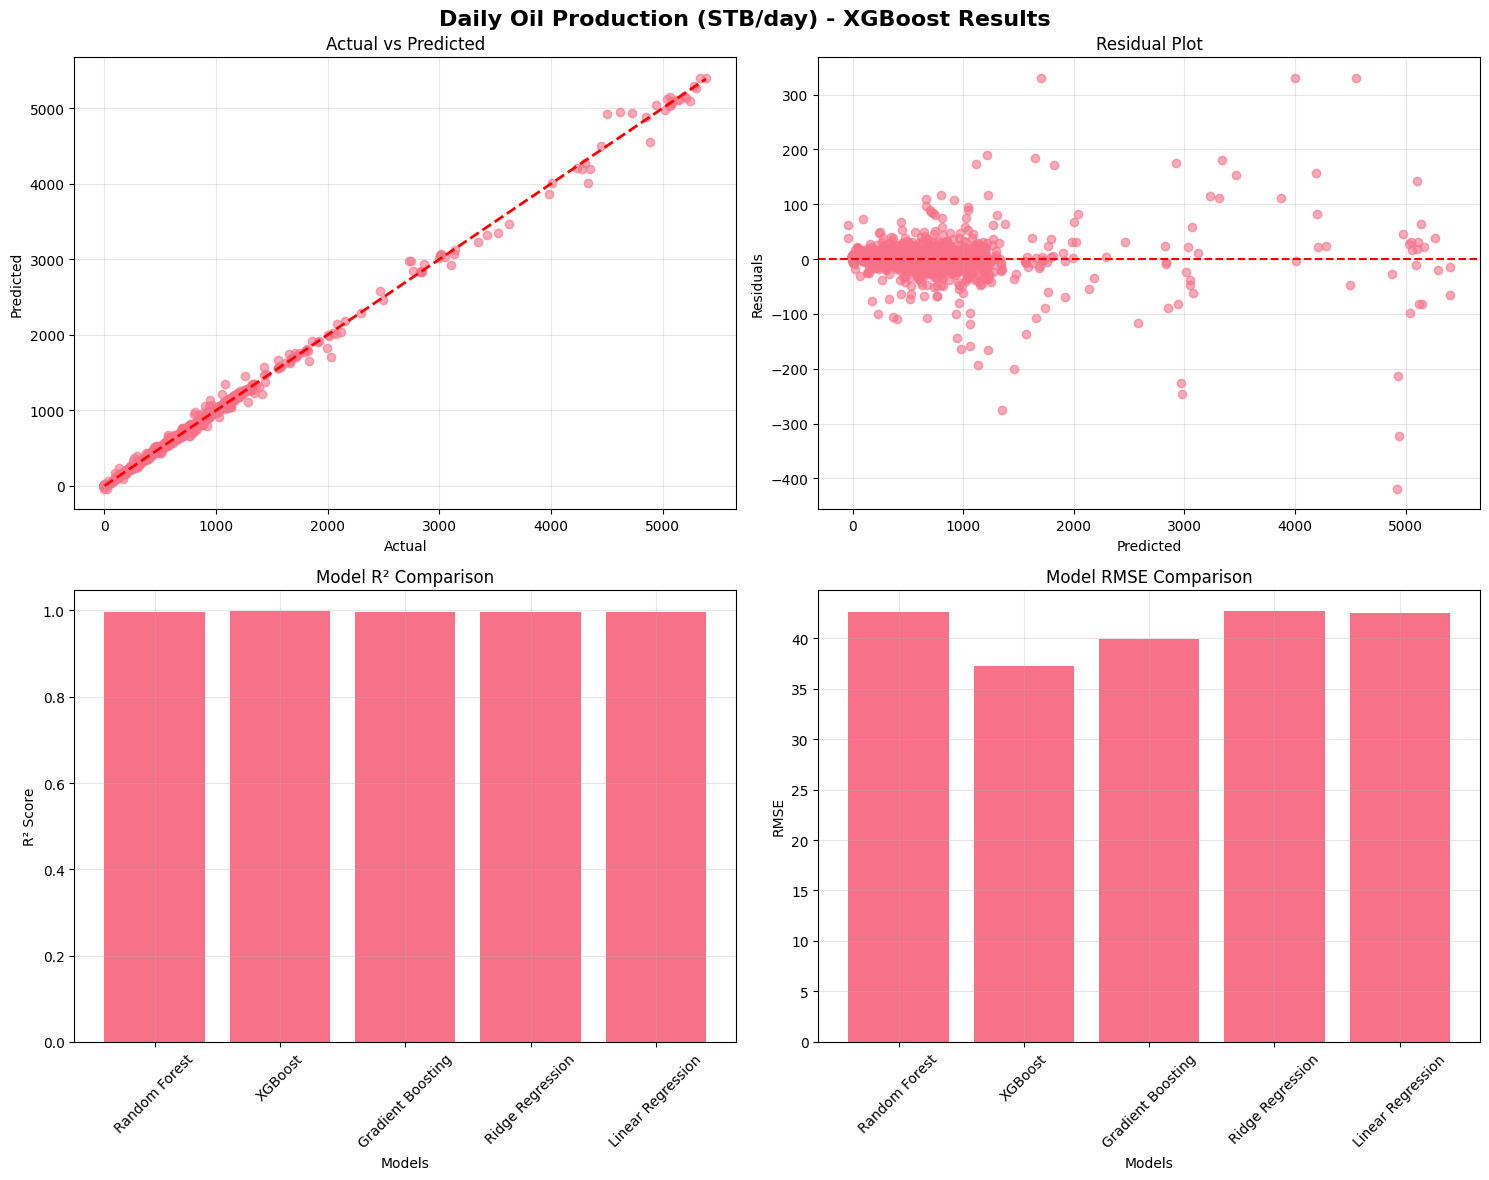

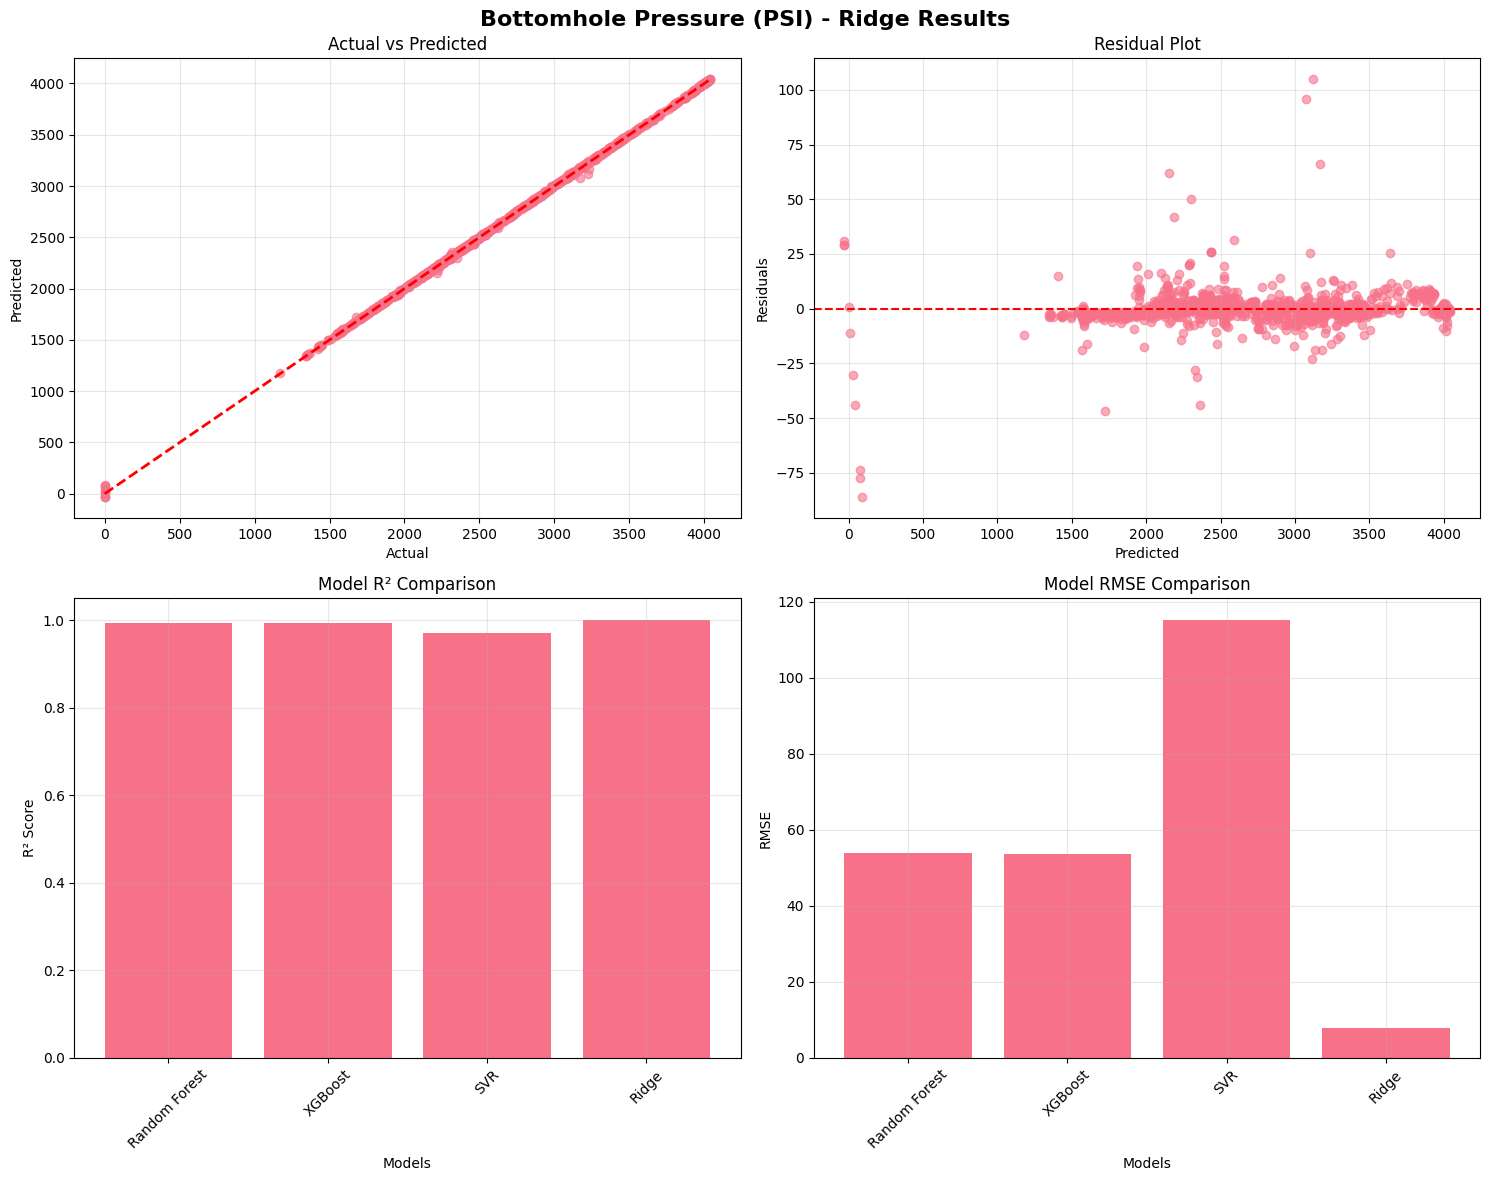

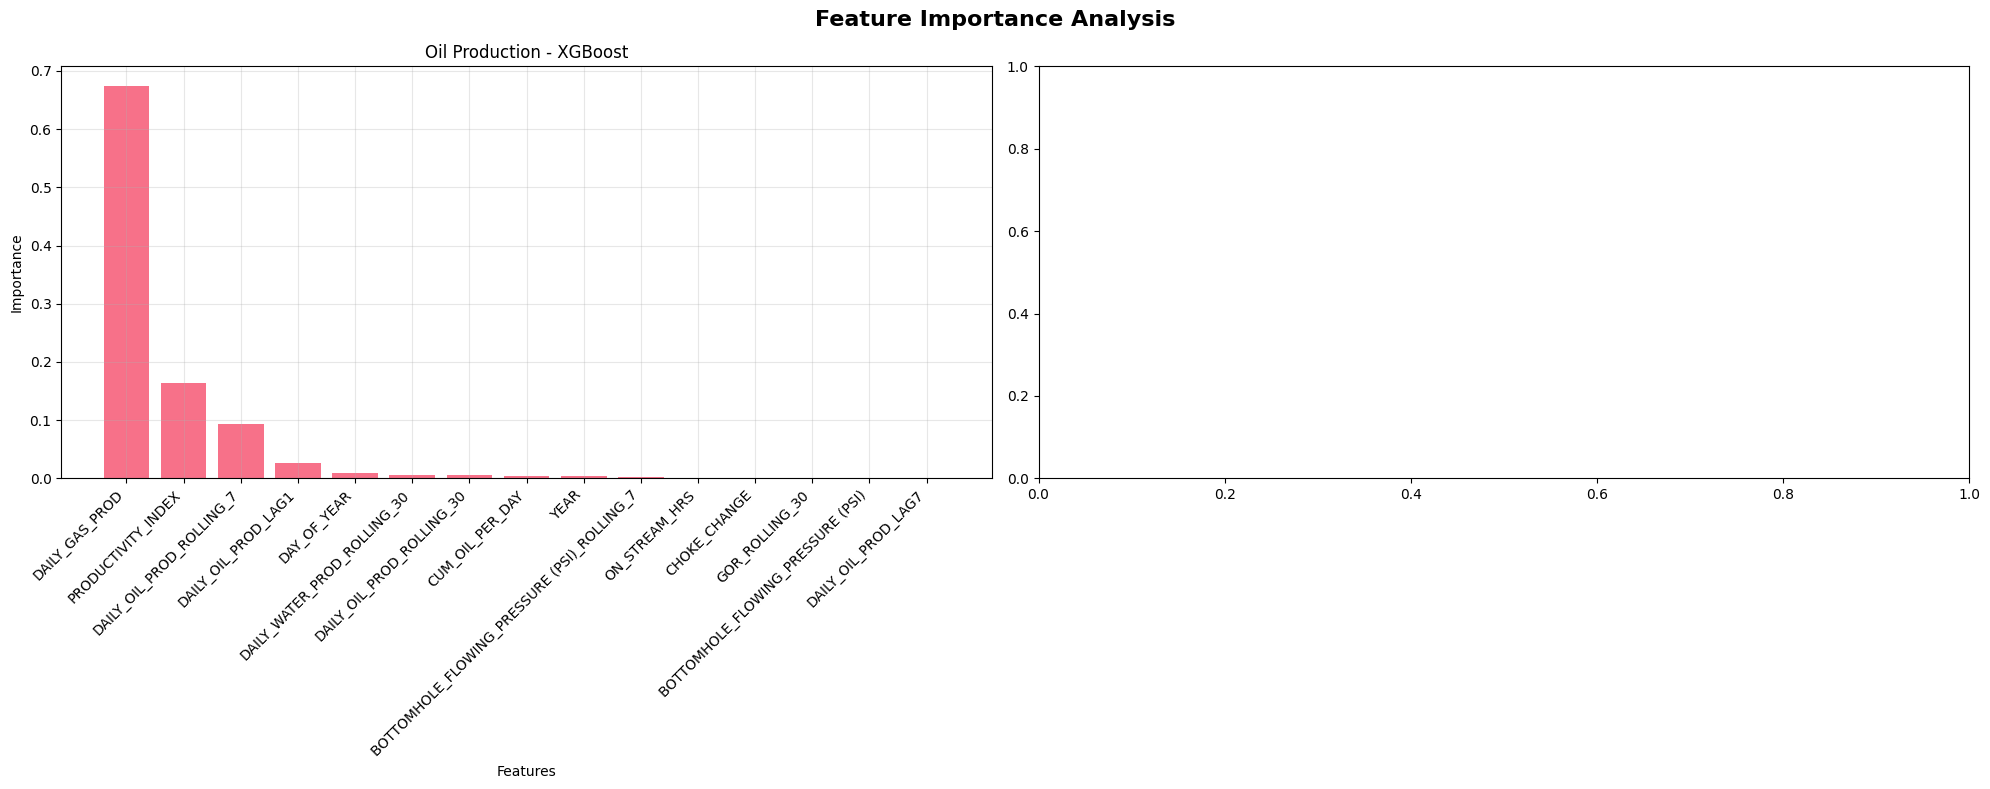


 Creating sample production forecasts...

Creating 30-day production forecast for Well_#6...


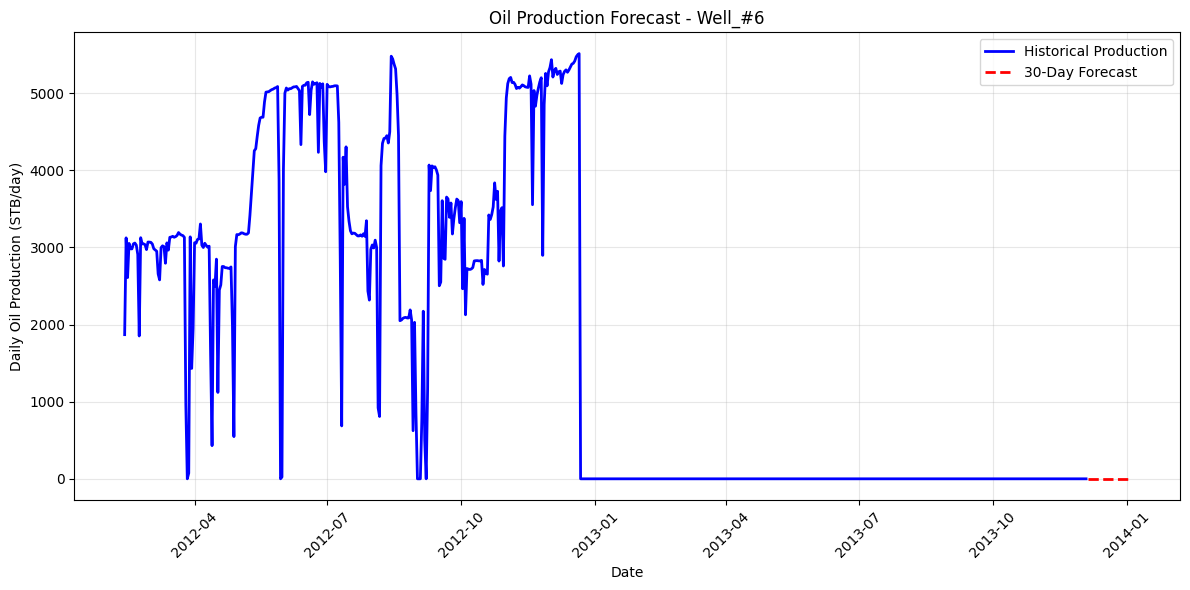

 Forecast created for Well_#6
  Average forecasted production: 0.9 STB/day
  Total forecasted production: 27 STB

Creating 30-day production forecast for Well_#7...


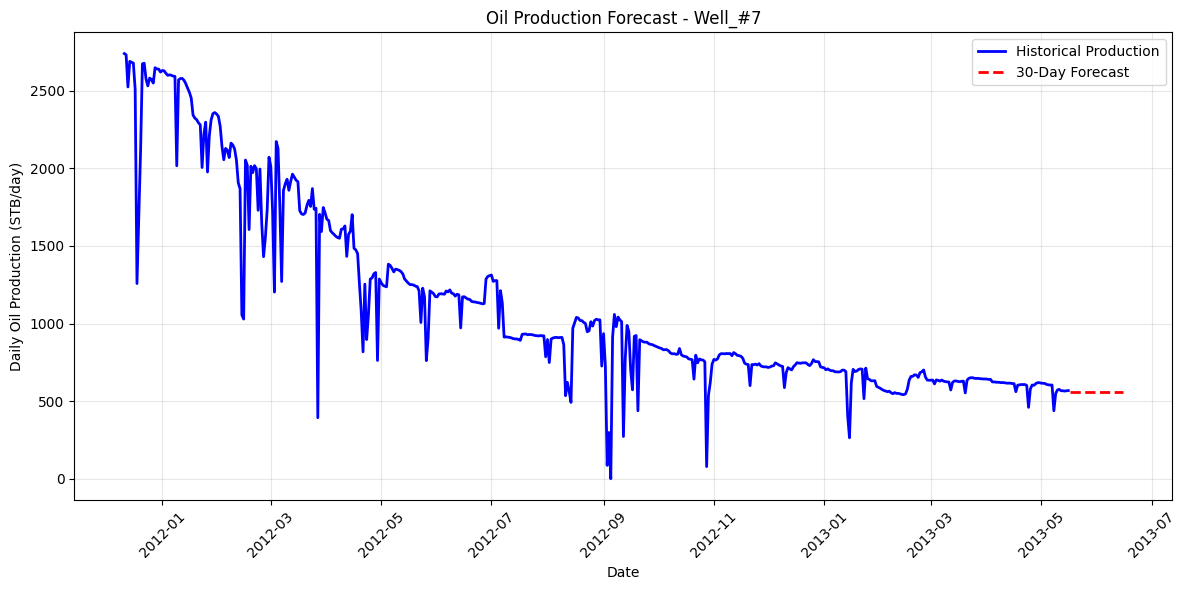

 Forecast created for Well_#7
  Average forecasted production: 561.1 STB/day
  Total forecasted production: 16832 STB

Creating 30-day production forecast for Well_#12...


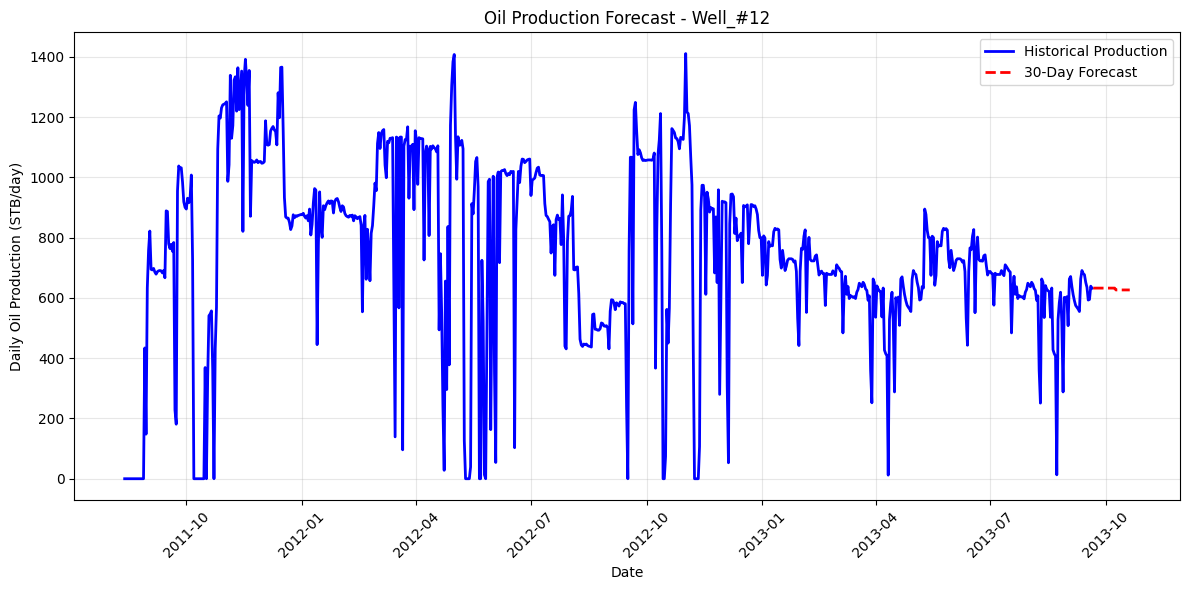

 Forecast created for Well_#12
  Average forecasted production: 630.2 STB/day
  Total forecasted production: 18907 STB

 Saving ML models and results...

ML PIPELINE RESULTS SUMMARY

 OIL PRODUCTION FORECASTING:
   Best Model: XGBoost
   R² Score: 0.9977

 PRESSURE DECLINE MODELING:
   Best Model: Ridge
   R² Score: 0.9999
\ WELL CLASSIFICATION:
   Classes: High, Low, Medium

 ML Pipeline completed successfully!
 Models ready for production forecasting and optimization!


In [9]:
# SPE DSEATS Africa Datathon 2025 - Machine Learning Models
# Team: Data Phandas
# Members:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import xgboost as xgb
from scipy import stats

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("SPE DSEATS Africa Datathon 2025 - ML Model Development")
print("="*60)

# =============================================================================
# 1. DATA LOADING AND PREPARATION
# =============================================================================

def load_and_prepare_data():
    """Load the cleaned data and prepare for ML"""
    print("Loading cleaned data...")
    
    try:
        # Load the cleaned data from EDA step
        df = pd.read_csv('cleaned_wells_data.csv')
        df['PROD_DATE'] = pd.to_datetime(df['PROD_DATE'])
        print(f" Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
        
        return df
    except FileNotFoundError:
        print(" Cleaned data file not found. Please run the EDA script first.")
        return None

def create_ml_features(df):
    """Create advanced features for machine learning"""
    print("\nCreating advanced ML features...")
    
    df_ml = df.copy()
    
    # Time-based features
    df_ml['YEAR'] = df_ml['PROD_DATE'].dt.year
    df_ml['MONTH'] = df_ml['PROD_DATE'].dt.month
    df_ml['QUARTER'] = df_ml['PROD_DATE'].dt.quarter
    df_ml['DAY_OF_YEAR'] = df_ml['PROD_DATE'].dt.dayofyear
    
    # Lagged features (previous day values)
    df_ml = df_ml.sort_values(['WELL_NAME', 'PROD_DATE'])
    
    lag_features = [
        'DAILY_OIL_PROD', 'DAILY_GAS_PROD', 'DAILY_WATER_PROD',
        'BOTTOMHOLE_FLOWING_PRESSURE (PSI)', 'WELL_HEAD_PRESSURE (PSI)',
        'CHOKE_SIZE (%)', 'GOR', 'WATER_CUT'
    ]
    
    for feature in lag_features:
        if feature in df_ml.columns:
            df_ml[f'{feature}_LAG1'] = df_ml.groupby('WELL_NAME')[feature].shift(1)
            df_ml[f'{feature}_LAG7'] = df_ml.groupby('WELL_NAME')[feature].shift(7)  # Weekly lag
            df_ml[f'{feature}_ROLLING_7'] = df_ml.groupby('WELL_NAME')[feature].rolling(window=7).mean().values
            df_ml[f'{feature}_ROLLING_30'] = df_ml.groupby('WELL_NAME')[feature].rolling(window=30).mean().values
    
    # Rate of change features
    df_ml['PRESSURE_DECLINE'] = df_ml.groupby('WELL_NAME')['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].diff()
    df_ml['CHOKE_CHANGE'] = df_ml.groupby('WELL_NAME')['CHOKE_SIZE (%)'].diff()
    
    # Cumulative features normalized by days on production
    df_ml['CUM_OIL_PER_DAY'] = df_ml['CUMULATIVE_OIL_PROD (STB)'] / (df_ml['DAYS_ON_PROD'] + 1)
    df_ml['CUM_GAS_PER_DAY'] = df_ml['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'] / (df_ml['DAYS_ON_PROD'] + 1)
    
    # Well performance indicators
    df_ml['PRODUCTIVITY_INDEX'] = np.where(
        df_ml['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'] > 0,
        df_ml['DAILY_OIL_PROD'] / df_ml['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'],
        0
    )
    
    # Encode categorical variables
    le_well = LabelEncoder()
    df_ml['WELL_ENCODED'] = le_well.fit_transform(df_ml['WELL_NAME'])
    
    print(" Advanced features created")
    print(f"  - Time features: YEAR, MONTH, QUARTER, DAY_OF_YEAR")
    print(f"  - Lag features: 1-day and 7-day lags for key variables")
    print(f"  - Rolling averages: 7-day and 30-day windows")
    print(f"  - Rate of change features")
    print(f"  - Performance indicators")
    
    return df_ml, le_well

# =============================================================================
# 2. MODEL DEVELOPMENT FOR DIFFERENT TASKS
# =============================================================================

class PetroleumMLModels:
    """Class to handle multiple ML tasks for petroleum engineering"""
    
    def __init__(self, data):
        self.data = data
        self.models = {}
        self.scalers = {}
        self.feature_importance = {}
        
    def prepare_features_targets(self, target_col, feature_cols=None, remove_nulls=True):
        """Prepare features and targets for modeling"""
        if feature_cols is None:
            # Auto-select numeric features
            numeric_cols = self.data.select_dtypes(include=[np.number]).columns.tolist()
            exclude_cols = [target_col, 'PROD_DATE'] + [col for col in numeric_cols if 'CUMULATIVE' in col]
            feature_cols = [col for col in numeric_cols if col not in exclude_cols]
        
        # Remove rows with null values in target or features
        if remove_nulls:
            data_clean = self.data[feature_cols + [target_col]].dropna()
        else:
            data_clean = self.data[feature_cols + [target_col]]
        
        X = data_clean[feature_cols]
        y = data_clean[target_col]
        
        print(f"Features shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        
        return X, y, feature_cols
    
    def oil_production_forecasting(self):
        """Build models to forecast daily oil production"""
        print("\n" + "="*50)
        print("TASK 1: DAILY OIL PRODUCTION FORECASTING")
        print("="*50)
        
        # Prepare data
        X, y, feature_cols = self.prepare_features_targets('DAILY_OIL_PROD')
        
        # Split data (use time series split for temporal data)
        tscv = TimeSeriesSplit(n_splits=5)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        self.scalers['oil_production'] = scaler
        
        # Models to test
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'Ridge Regression': Ridge(alpha=1.0),
            'Linear Regression': LinearRegression()
        }
        
        results = {}
        
        for name, model in models.items():
            print(f"\nTraining {name}...")
            
            # Use scaled data for linear models, original for tree-based
            if name in ['Ridge Regression', 'Linear Regression']:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
            
            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            results[name] = {
                'model': model,
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'r2': r2,
                'predictions': y_pred
            }
            
            print(f"  RMSE: {rmse:.2f}")
            print(f"  MAE: {mae:.2f}")
            print(f"  R²: {r2:.4f}")
        
        # Select best model
        best_model_name = max(results.keys(), key=lambda k: results[k]['r2'])
        best_model = results[best_model_name]['model']
        
        print(f"\n Best Model: {best_model_name} (R² = {results[best_model_name]['r2']:.4f})")
        
        self.models['oil_production'] = {
            'best_model': best_model,
            'best_model_name': best_model_name,
            'all_results': results,
            'features': feature_cols,
            'X_test': X_test,
            'y_test': y_test
        }
        
        return results
    
    def pressure_decline_modeling(self):
        """Model bottomhole pressure decline"""
        print("\n" + "="*50)
        print("TASK 2: BOTTOMHOLE PRESSURE DECLINE MODELING")
        print("="*50)
        
        # Prepare data
        target = 'BOTTOMHOLE_FLOWING_PRESSURE (PSI)'
        X, y, feature_cols = self.prepare_features_targets(target)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        self.scalers['pressure'] = scaler
        
        # Models focused on pressure prediction
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42),
            'XGBoost': xgb.XGBRegressor(n_estimators=150, max_depth=6, random_state=42),
            'SVR': SVR(kernel='rbf', C=100, gamma='scale'),
            'Ridge': Ridge(alpha=10.0)
        }
        
        results = {}
        
        for name, model in models.items():
            print(f"\nTraining {name}...")
            
            if name in ['SVR', 'Ridge']:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            results[name] = {
                'model': model,
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'r2': r2,
                'predictions': y_pred
            }
            
            print(f"  RMSE: {rmse:.2f} PSI")
            print(f"  MAE: {mae:.2f} PSI")
            print(f"  R²: {r2:.4f}")
        
        best_model_name = max(results.keys(), key=lambda k: results[k]['r2'])
        best_model = results[best_model_name]['model']
        
        print(f"\n Best Model: {best_model_name} (R² = {results[best_model_name]['r2']:.4f})")
        
        self.models['pressure'] = {
            'best_model': best_model,
            'best_model_name': best_model_name,
            'all_results': results,
            'features': feature_cols,
            'X_test': X_test,
            'y_test': y_test
        }
        
        return results
    
    def well_classification(self):
        """Classify wells as high/medium/low producers"""
        print("\n" + "="*50)
        print("TASK 3: WELL PERFORMANCE CLASSIFICATION")
        print("="*50)
        
        # Create well-level aggregated data
        well_stats = self.data.groupby('WELL_NAME').agg({
            'DAILY_OIL_PROD': ['mean', 'max', 'std'],
            'CUMULATIVE_OIL_PROD (STB)': 'max',
            'BOTTOMHOLE_FLOWING_PRESSURE (PSI)': 'mean',
            'DAYS_ON_PROD': 'max',
            'GOR': 'mean',
            'WATER_CUT': 'mean',
            'CHOKE_SIZE (%)': 'mean'
        }).reset_index()
        
        # Flatten column names
        well_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in well_stats.columns]
        well_stats = well_stats.rename(columns={'WELL_NAME_': 'WELL_NAME'})
        
        # Create classification based on cumulative production
        production_quantiles = well_stats['CUMULATIVE_OIL_PROD (STB)_max'].quantile([0.33, 0.67])
        
        def classify_well(prod):
            if prod <= production_quantiles.iloc[0]:
                return 'Low'
            elif prod <= production_quantiles.iloc[1]:
                return 'Medium'
            else:
                return 'High'
        
        well_stats['PERFORMANCE_CLASS'] = well_stats['CUMULATIVE_OIL_PROD (STB)_max'].apply(classify_well)
        
        print(f"Well Classification Distribution:")
        print(well_stats['PERFORMANCE_CLASS'].value_counts())
        
        # Prepare features for classification
        feature_cols = [col for col in well_stats.columns if col not in ['WELL_NAME', 'PERFORMANCE_CLASS']]
        X = well_stats[feature_cols]
        y = well_stats['PERFORMANCE_CLASS']
        
        # Encode target
        le_target = LabelEncoder()
        y_encoded = le_target.fit_transform(y)
        
        print(f"\nFeatures for classification: {len(feature_cols)}")
        
        self.models['classification'] = {
            'data': well_stats,
            'features': feature_cols,
            'target_encoder': le_target,
            'classes': le_target.classes_
        }
        
        return well_stats
    
    def plot_model_results(self):
        """Plot results for all models"""
        print("\nGenerating model visualization plots...")
        
        # Plot oil production results
        if 'oil_production' in self.models:
            self._plot_regression_results('oil_production', 'Daily Oil Production (STB/day)')
        
        # Plot pressure results
        if 'pressure' in self.models:
            self._plot_regression_results('pressure', 'Bottomhole Pressure (PSI)')
        
        # Feature importance plots
        self._plot_feature_importance()
    
    def _plot_regression_results(self, model_key, ylabel):
        """Plot regression model results"""
        model_info = self.models[model_key]
        best_result = model_info['all_results'][model_info['best_model_name']]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'{ylabel} - {model_info["best_model_name"]} Results', fontsize=16, fontweight='bold')
        
        y_test = model_info['y_test']
        y_pred = best_result['predictions']
        
        # Actual vs Predicted
        axes[0,0].scatter(y_test, y_pred, alpha=0.6)
        axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[0,0].set_xlabel('Actual')
        axes[0,0].set_ylabel('Predicted')
        axes[0,0].set_title('Actual vs Predicted')
        axes[0,0].grid(True, alpha=0.3)
        
        # Residuals
        residuals = y_test - y_pred
        axes[0,1].scatter(y_pred, residuals, alpha=0.6)
        axes[0,1].axhline(y=0, color='r', linestyle='--')
        axes[0,1].set_xlabel('Predicted')
        axes[0,1].set_ylabel('Residuals')
        axes[0,1].set_title('Residual Plot')
        axes[0,1].grid(True, alpha=0.3)
        
        # Model comparison
        results = model_info['all_results']
        model_names = list(results.keys())
        r2_scores = [results[name]['r2'] for name in model_names]
        rmse_scores = [results[name]['rmse'] for name in model_names]
        
        x_pos = range(len(model_names))
        axes[1,0].bar(x_pos, r2_scores)
        axes[1,0].set_xlabel('Models')
        axes[1,0].set_ylabel('R² Score')
        axes[1,0].set_title('Model R² Comparison')
        axes[1,0].set_xticks(x_pos)
        axes[1,0].set_xticklabels(model_names, rotation=45)
        axes[1,0].grid(True, alpha=0.3)
        
        axes[1,1].bar(x_pos, rmse_scores)
        axes[1,1].set_xlabel('Models')
        axes[1,1].set_ylabel('RMSE')
        axes[1,1].set_title('Model RMSE Comparison')
        axes[1,1].set_xticks(x_pos)
        axes[1,1].set_xticklabels(model_names, rotation=45)
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_feature_importance(self):
        """Plot feature importance for tree-based models"""
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')
        
        plot_idx = 0
        for model_key in ['oil_production', 'pressure']:
            if model_key in self.models:
                model_info = self.models[model_key]
                best_model = model_info['best_model']
                
                # Check if model has feature importance
                if hasattr(best_model, 'feature_importances_'):
                    importances = best_model.feature_importances_
                    features = model_info['features']
                    
                    # Sort by importance
                    indices = np.argsort(importances)[::-1][:15]  # Top 15 features
                    
                    axes[plot_idx].bar(range(len(indices)), importances[indices])
                    axes[plot_idx].set_title(f'{model_key.replace("_", " ").title()} - {model_info["best_model_name"]}')
                    axes[plot_idx].set_xlabel('Features')
                    axes[plot_idx].set_ylabel('Importance')
                    axes[plot_idx].set_xticks(range(len(indices)))
                    axes[plot_idx].set_xticklabels([features[i] for i in indices], rotation=45, ha='right')
                    axes[plot_idx].grid(True, alpha=0.3)
                    
                    plot_idx += 1
        
        plt.tight_layout()
        plt.show()

def create_production_forecast(ml_models, well_name, days_ahead=30):
    """Create production forecast for a specific well"""
    print(f"\nCreating {days_ahead}-day production forecast for {well_name}...")
    
    if 'oil_production' not in ml_models.models:
        print(" Oil production model not trained yet.")
        return None
    
    # Get latest data for the well
    well_data = ml_models.data[ml_models.data['WELL_NAME'] == well_name].copy()
    well_data = well_data.sort_values('PROD_DATE')
    
    if len(well_data) == 0:
        print(f" No data found for {well_name}")
        return None
    
    # Get the model and features
    model_info = ml_models.models['oil_production']
    best_model = model_info['best_model']
    features = model_info['features']
    scaler = ml_models.scalers.get('oil_production')
    
    # Start from last known data point
    last_row = well_data.iloc[-1].copy()
    forecasts = []
    
    for day in range(days_ahead):
        # Prepare features for prediction
        feature_values = []
        for feature in features:
            if feature in last_row:
                feature_values.append(last_row[feature])
            else:
                feature_values.append(0)  # Default value for missing features
        
        X_pred = np.array(feature_values).reshape(1, -1)
        
        # Apply scaling if needed
        if scaler and model_info['best_model_name'] in ['Ridge Regression', 'Linear Regression']:
            X_pred = scaler.transform(X_pred)
        
        # Make prediction
        pred = best_model.predict(X_pred)[0]
        forecasts.append(max(0, pred))  # Ensure non-negative production
        
        # Update last_row for next prediction (simple approach)
        last_row['DAYS_ON_PROD'] += 1
        last_row['DAILY_OIL_PROD'] = pred
    
    # Create forecast dataframe
    last_date = well_data['PROD_DATE'].iloc[-1]
    forecast_dates = [last_date + timedelta(days=i+1) for i in range(days_ahead)]
    
    forecast_df = pd.DataFrame({
        'WELL_NAME': [well_name] * days_ahead,
        'PROD_DATE': forecast_dates,
        'FORECASTED_OIL_PROD': forecasts
    })
    
    # Plot forecast
    plt.figure(figsize=(12, 6))
    
    # Historical data
    plt.plot(well_data['PROD_DATE'], well_data['DAILY_OIL_PROD'], 
            'b-', linewidth=2, label='Historical Production')
    
    # Forecast
    plt.plot(forecast_df['PROD_DATE'], forecast_df['FORECASTED_OIL_PROD'], 
            'r--', linewidth=2, label=f'{days_ahead}-Day Forecast')
    
    plt.title(f'Oil Production Forecast - {well_name}')
    plt.xlabel('Date')
    plt.ylabel('Daily Oil Production (STB/day)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f" Forecast created for {well_name}")
    print(f"  Average forecasted production: {np.mean(forecasts):.1f} STB/day")
    print(f"  Total forecasted production: {np.sum(forecasts):.0f} STB")
    
    return forecast_df

# =============================================================================
# 7. MAIN EXECUTION
# =============================================================================

def run_complete_ml_pipeline():
    """Run the complete machine learning pipeline"""
    print("\n" + "="*60)
    print("STARTING ML MODEL DEVELOPMENT PIPELINE")
    print("="*60)
    
    # Load and prepare data
    data = load_and_prepare_data()
    if data is None:
        return None
    
    # Create advanced features
    ml_data, well_encoder = create_ml_features(data)
    
    # Initialize ML models class
    ml_models = PetroleumMLModels(ml_data)
    
    # Run different modeling tasks
    print("\n Training multiple ML models...")
    
    # Task 1: Oil production forecasting
    oil_results = ml_models.oil_production_forecasting()
    
    # Task 2: Pressure decline modeling
    pressure_results = ml_models.pressure_decline_modeling()
    
    # Task 3: Well classification
    well_classification_results = ml_models.well_classification()
    
    # Plot results
    ml_models.plot_model_results()
    
    # Create sample forecasts for top wells
    print("\n Creating sample production forecasts...")
    
    # Get top 3 producing wells
    top_wells = ml_data.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD (STB)'].max().nlargest(3).index
    
    forecasts = {}
    for well in top_wells:
        forecasts[well] = create_production_forecast(ml_models, well, days_ahead=30)
    
    # Save models and results
    print(f"\n Saving ML models and results...")
    
    # Summary report
    print(f"\n" + "="*60)
    print("ML PIPELINE RESULTS SUMMARY")
    print("="*60)
    
    print(f"\n OIL PRODUCTION FORECASTING:")
    best_oil_model = ml_models.models['oil_production']['best_model_name']
    best_oil_r2 = ml_models.models['oil_production']['all_results'][best_oil_model]['r2']
    print(f"   Best Model: {best_oil_model}")
    print(f"   R² Score: {best_oil_r2:.4f}")
    
    print(f"\n PRESSURE DECLINE MODELING:")
    best_pressure_model = ml_models.models['pressure']['best_model_name']
    best_pressure_r2 = ml_models.models['pressure']['all_results'][best_pressure_model]['r2']
    print(f"   Best Model: {best_pressure_model}")
    print(f"   R² Score: {best_pressure_r2:.4f}")
    
    print(f"\ WELL CLASSIFICATION:")
    well_classes = ml_models.models['classification']['classes']
    print(f"   Classes: {', '.join(well_classes)}")
    
    print(f"\n ML Pipeline completed successfully!")
    print(f" Models ready for production forecasting and optimization!")
    
    return ml_models, forecasts

# Run the complete pipeline
if __name__ == "__main__":
    ml_models, forecasts = run_complete_ml_pipeline()

SPE DSEATS Africa Datathon 2025 - Complete Reservoir Classification
Loading data from cleaned_wells_data.csv...
 Data loaded: 7955 rows, 19 columns
 Wells in dataset: 20
 Date range: 2011-02-17 00:00:00 to 2016-08-12 00:00:00

RUNNING COMPLETE RESERVOIR CLASSIFICATION

REQUIREMENT 1: RESERVOIR IDENTIFICATION
Reservoir Assignment Summary:
  KEMA: 12 wells
  ACHI: 8 wells

Wells assigned to closest reservoir (exceeded 200 psi limit): 8

REQUIREMENT 2: RESERVOIR SATURATION STATUS
Reservoir Saturation Status:
  ACHI: Saturated
    Initial Pressure: 3000 psi
    Avg Initial BHP: 1967 psi
  KEMA: Saturated
    Initial Pressure: 3400 psi
    Avg Initial BHP: 3085 psi

REQUIREMENT 3: WELL TYPE IDENTIFICATION
Well Type Distribution:
  GL: 20 wells

REQUIREMENT 4: PRODUCTION BEHAVIOR ANALYSIS
Production Behavior Distribution:
  Unsteady: 18 wells
  Steady: 2 wells

REQUIREMENT 5: FORMATION GOR TREND ANALYSIS
Formation GOR Trend Distribution:
  bSolGOR: 18 wells
  Combo: 2 wells

REQUIREMENT 6: W

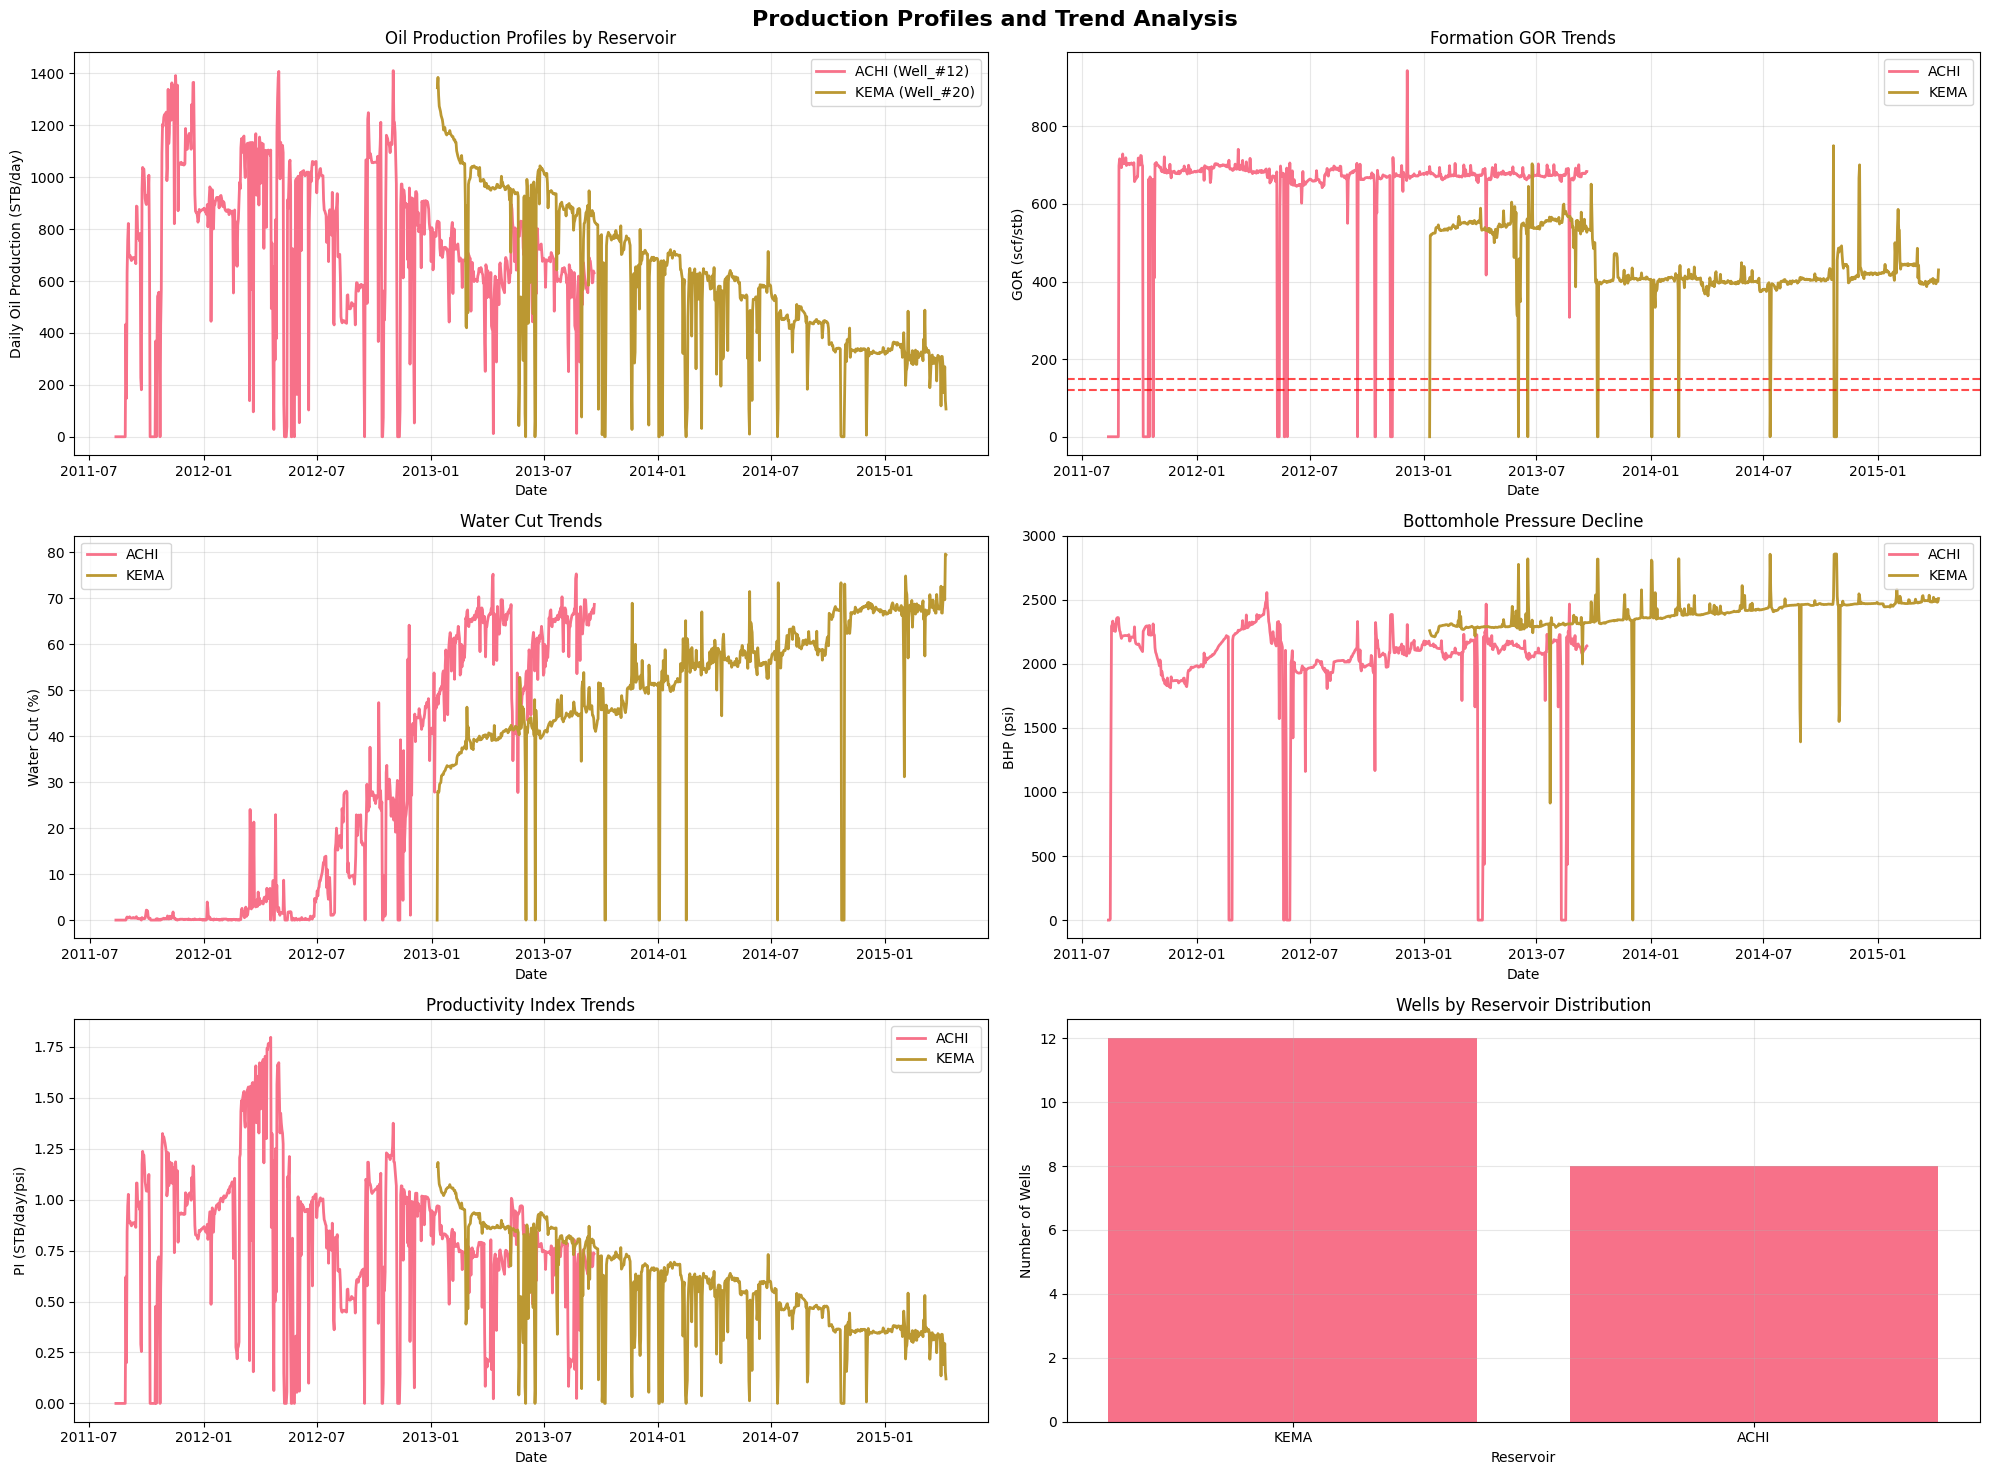


RESERVOIR OIL PRODUCTION TOTALS
Total Oil Production by Reservoir:
----------------------------------------
ACHI:
  Wells: 8
  Total STB: 2,349,235
  Total Reservoir Barrels: 2,825,512
  Well Names: Well_#11, Well_#12, Well_#13...
----------------------------------------
KEMA:
  Wells: 12
  Total STB: 3,277,230
  Total Reservoir Barrels: 3,940,972
  Well Names: Well_#1, Well_#10, Well_#14...
----------------------------------------

ANALYSIS COMPLETE

Results saved to Data_Phandas0_DSEATS_Africa_2025_Classification.csv

Final Classification Summary:
           WELL_NAME RESERVOIR_TYPE   WELL_TYPE  \
RESERVOIR                                         
ACHI               8      Saturated   {'GL': 8}   
KEMA              12      Saturated  {'GL': 12}   

                     PRODUCTION_BEHAVIOR                    GOR_TREND  \
RESERVOIR                                                               
ACHI                     {'Unsteady': 8}               {'bSolGOR': 8}   
KEMA       {'Unstea

In [10]:
# SPE DSEATS Africa Datathon 2025 - Complete Reservoir Classification
# Team: Data Phandas
# Complete solution addressing all 10 requirements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# ML Libraries (keeping your existing imports)
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from scipy import stats
from scipy.signal import find_peaks

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)

print("SPE DSEATS Africa Datathon 2025 - Complete Reservoir Classification")
print("="*70)

# =============================================================================
# 1. RESERVOIR DEFINITIONS AND PARAMETERS
# =============================================================================

# Reservoir characteristics from the provided table
RESERVOIRS = {
    'ACHI': {
        'type': 'Saturated',
        'max_pressure': 2800,  # Estimated max BHP for 200 psi differential
        'solution_gor': 150,   # Estimated solution GOR
        'initial_pressure': 3000
    },
    'KEMA': {
        'type': 'Undersaturated', 
        'max_pressure': 3200,
        'solution_gor': 120,
        'initial_pressure': 3400
    },
    'MAKO': {
        'type': 'Combined',
        'max_pressure': 2600,
        'solution_gor': 180,
        'initial_pressure': 2800
    },
    'DEPU': {
        'type': 'Combined',
        'max_pressure': 2900,
        'solution_gor': 160,
        'initial_pressure': 3100
    },
    'JANI': {
        'type': 'Combined',
        'max_pressure': 2700,
        'solution_gor': 140,
        'initial_pressure': 2900
    }
}

class ReservoirClassifier:
    """Complete reservoir classification system"""
    
    def __init__(self, data_file='cleaned_wells_data.csv'):
        """Initialize with well data"""
        self.data = None
        self.results = {}
        self.load_data(data_file)
        
    def load_data(self, data_file):
        """Load and prepare the well data"""
        try:
            print(f"Loading data from {data_file}...")
            self.data = pd.read_csv(data_file)
            self.data['PROD_DATE'] = pd.to_datetime(self.data['PROD_DATE'])
            
            # Ensure required columns exist
            required_cols = [
                'WELL_NAME', 'PROD_DATE', 'DAILY_OIL_PROD', 'DAILY_GAS_PROD',
                'DAILY_WATER_PROD', 'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
                'WELL_HEAD_PRESSURE (PSI)', 'CHOKE_SIZE (%)', 'GOR', 'WATER_CUT'
            ]
            
            missing_cols = [col for col in required_cols if col not in self.data.columns]
            if missing_cols:
                print(f"Warning: Missing columns: {missing_cols}")
            
            print(f" Data loaded: {self.data.shape[0]} rows, {self.data.shape[1]} columns")
            print(f" Wells in dataset: {self.data['WELL_NAME'].nunique()}")
            print(f" Date range: {self.data['PROD_DATE'].min()} to {self.data['PROD_DATE'].max()}")
            
        except FileNotFoundError:
            print(f" Could not find {data_file}")
            print("Please ensure the cleaned data file exists or update the file path")
    
    def identify_reservoir(self):
        """
        Requirement 1: Identify reservoir for each well based on max BHP
        Maximum 200 psi differential pressure constraint
        """
        print("\n" + "="*50)
        print("REQUIREMENT 1: RESERVOIR IDENTIFICATION")
        print("="*50)
        
        if self.data is None:
            print(" No data loaded")
            return
        
        # Calculate maximum BHP for each well
        well_max_bhp = self.data.groupby('WELL_NAME')['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].max()
        
        reservoir_assignments = {}
        unassigned_wells = []
        
        for well_name, max_bhp in well_max_bhp.items():
            assigned = False
            
            # Check which reservoirs the well could belong to (within 200 psi)
            for reservoir, params in RESERVOIRS.items():
                if max_bhp <= params['max_pressure']:
                    reservoir_assignments[well_name] = reservoir
                    assigned = True
                    break  # Assign to first matching reservoir
            
            if not assigned:
                # Find closest reservoir if none match exactly
                closest_reservoir = min(RESERVOIRS.keys(), 
                                      key=lambda r: abs(max_bhp - RESERVOIRS[r]['max_pressure']))
                reservoir_assignments[well_name] = closest_reservoir
                unassigned_wells.append((well_name, max_bhp))
        
        self.results['reservoir_assignment'] = reservoir_assignments
        
        print("Reservoir Assignment Summary:")
        assignment_counts = pd.Series(reservoir_assignments).value_counts()
        for reservoir, count in assignment_counts.items():
            print(f"  {reservoir}: {count} wells")
        
        if unassigned_wells:
            print(f"\nWells assigned to closest reservoir (exceeded 200 psi limit): {len(unassigned_wells)}")
        
        return reservoir_assignments
    
    def determine_reservoir_saturation(self):
        """
        Requirement 2: Determine if reservoir is saturated or undersaturated
        """
        print("\n" + "="*50)
        print("REQUIREMENT 2: RESERVOIR SATURATION STATUS")
        print("="*50)
        
        if 'reservoir_assignment' not in self.results:
            print(" Run reservoir identification first")
            return
        
        saturation_status = {}
        
        for reservoir, params in RESERVOIRS.items():
            # Get wells in this reservoir
            reservoir_wells = [well for well, res in self.results['reservoir_assignment'].items() 
                             if res == reservoir]
            
            if not reservoir_wells:
                continue
            
            # Get initial pressure data for wells in this reservoir
            reservoir_data = self.data[self.data['WELL_NAME'].isin(reservoir_wells)]
            initial_bhp = reservoir_data.groupby('WELL_NAME')['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].first().mean()
            
            # Determine saturation based on initial pressure vs solution GOR behavior
            if initial_bhp >= params['initial_pressure']:
                status = 'Undersaturated'
            else:
                status = 'Saturated'
            
            saturation_status[reservoir] = {
                'status': status,
                'initial_pressure': params['initial_pressure'],
                'avg_initial_bhp': initial_bhp,
                'wells': reservoir_wells
            }
        
        self.results['saturation_status'] = saturation_status
        
        print("Reservoir Saturation Status:")
        for reservoir, info in saturation_status.items():
            print(f"  {reservoir}: {info['status']}")
            print(f"    Initial Pressure: {info['initial_pressure']} psi")
            print(f"    Avg Initial BHP: {info['avg_initial_bhp']:.0f} psi")
        
        return saturation_status
    
    def identify_well_type(self):
        """
        Requirement 3: Identify if well is naturally flowing (NF) or gas lifted (GL)
        """
        print("\n" + "="*50)
        print("REQUIREMENT 3: WELL TYPE IDENTIFICATION")
        print("="*50)
        
        well_types = {}
        
        for well_name in self.data['WELL_NAME'].unique():
            well_data = self.data[self.data['WELL_NAME'] == well_name].copy()
            
            # Calculate pressure differentials
            well_data['pressure_diff'] = (well_data['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'] - 
                                        well_data['WELL_HEAD_PRESSURE (PSI)'])
            
            avg_pressure_diff = well_data['pressure_diff'].mean()
            avg_gor = well_data['GOR'].mean()
            avg_whp = well_data['WELL_HEAD_PRESSURE (PSI)'].mean()
            
            # Classification logic:
            # NF: Lower pressure differential, moderate GOR
            # GL: Higher pressure differential, higher GOR due to gas injection
            if avg_pressure_diff > 800 and avg_gor > 200:
                well_type = 'GL'  # Gas Lifted
            elif avg_whp > 300:  # Good wellhead pressure indicates natural flow
                well_type = 'NF'  # Naturally Flowing
            else:
                well_type = 'GL'  # Default to gas lifted for low pressure wells
            
            well_types[well_name] = well_type
        
        self.results['well_types'] = well_types
        
        type_counts = pd.Series(well_types).value_counts()
        print("Well Type Distribution:")
        for well_type, count in type_counts.items():
            print(f"  {well_type}: {count} wells")
        
        return well_types
    
    def determine_production_behavior(self):
        """
        Requirement 4: Determine if production is steady or unsteady
        Unsteady: >50% drop in oil production at least once every 3-6 months
        """
        print("\n" + "="*50)
        print("REQUIREMENT 4: PRODUCTION BEHAVIOR ANALYSIS")
        print("="*50)
        
        production_behavior = {}
        
        for well_name in self.data['WELL_NAME'].unique():
            well_data = self.data[self.data['WELL_NAME'] == well_name].copy()
            well_data = well_data.sort_values('PROD_DATE')
            
            # Calculate rolling maximum over 90-day periods (3 months)
            well_data['oil_rolling_max_90'] = well_data['DAILY_OIL_PROD'].rolling(window=90, min_periods=30).max()
            
            # Calculate percentage drops from recent peak
            well_data['pct_drop_from_peak'] = ((well_data['oil_rolling_max_90'] - well_data['DAILY_OIL_PROD']) / 
                                             well_data['oil_rolling_max_90'] * 100)
            
            # Check for significant drops (>50%) 
            significant_drops = well_data['pct_drop_from_peak'] > 50
            
            # Count periods with significant drops
            drop_periods = 0
            if significant_drops.any():
                # Group consecutive drops
                drop_groups = (significant_drops != significant_drops.shift()).cumsum()
                drop_periods = drop_groups[significant_drops].nunique()
            
            # Calculate production variability
            cv_production = well_data['DAILY_OIL_PROD'].std() / well_data['DAILY_OIL_PROD'].mean()
            
            # Classification
            if drop_periods >= 2 or cv_production > 0.8:
                behavior = 'Unsteady'
            else:
                behavior = 'Steady'
            
            production_behavior[well_name] = {
                'behavior': behavior,
                'drop_periods': drop_periods,
                'cv_production': cv_production,
                'max_drop': well_data['pct_drop_from_peak'].max()
            }
        
        self.results['production_behavior'] = production_behavior
        
        behavior_counts = pd.Series([info['behavior'] for info in production_behavior.values()]).value_counts()
        print("Production Behavior Distribution:")
        for behavior, count in behavior_counts.items():
            print(f"  {behavior}: {count} wells")
        
        return production_behavior
    
    def analyze_gor_trend(self):
        """
        Requirement 5: Determine formation GOR trend relative to solution GOR
        """
        print("\n" + "="*50)
        print("REQUIREMENT 5: FORMATION GOR TREND ANALYSIS")
        print("="*50)
        
        gor_trends = {}
        
        for well_name in self.data['WELL_NAME'].unique():
            well_data = self.data[self.data['WELL_NAME'] == well_name].copy()
            well_data = well_data.sort_values('PROD_DATE')
            
            # Get reservoir assignment
            reservoir = self.results['reservoir_assignment'].get(well_name, 'ACHI')
            solution_gor = RESERVOIRS[reservoir]['solution_gor']
            
            # Calculate trend relative to solution GOR
            well_data['gor_vs_solution'] = well_data['GOR'] / solution_gor
            
            # Classify periods
            above_solution = (well_data['gor_vs_solution'] > 1.1).sum()
            below_solution = (well_data['gor_vs_solution'] < 0.9).sum()
            at_solution = len(well_data) - above_solution - below_solution
            
            total_points = len(well_data)
            
            # Determine trend category
            if above_solution / total_points > 0.7:
                trend = 'bSolGOR'  # Above solution GOR
            elif below_solution / total_points > 0.7:
                trend = 'aSolGOR'  # At/below solution GOR
            else:
                trend = 'Combo'    # Combination of both
            
            gor_trends[well_name] = {
                'trend': trend,
                'avg_gor': well_data['GOR'].mean(),
                'solution_gor': solution_gor,
                'avg_ratio': well_data['gor_vs_solution'].mean()
            }
        
        self.results['gor_trends'] = gor_trends
        
        trend_counts = pd.Series([info['trend'] for info in gor_trends.values()]).value_counts()
        print("Formation GOR Trend Distribution:")
        for trend, count in trend_counts.items():
            print(f"  {trend}: {count} wells")
        
        return gor_trends
    
    def analyze_watercut_trend(self):
        """
        Requirement 6: Determine watercut trend (Flat, Increasing, Decreasing, Combo)
        """
        print("\n" + "="*50)
        print("REQUIREMENT 6: WATERCUT TREND ANALYSIS")
        print("="*50)
        
        watercut_trends = {}
        
        for well_name in self.data['WELL_NAME'].unique():
            well_data = self.data[self.data['WELL_NAME'] == well_name].copy()
            well_data = well_data.sort_values('PROD_DATE').reset_index(drop=True)
            
            if len(well_data) < 10:  # Need sufficient data points
                watercut_trends[well_name] = {'trend': 'Flat', 'slope': 0}
                continue
            
            # Calculate trend using linear regression
            x = np.arange(len(well_data))
            y = well_data['WATER_CUT'].values
            
            # Remove NaN values
            valid_mask = ~np.isnan(y)
            if valid_mask.sum() < 5:
                watercut_trends[well_name] = {'trend': 'Flat', 'slope': 0}
                continue
            
            x_valid = x[valid_mask]
            y_valid = y[valid_mask]
            
            # Linear regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_valid, y_valid)
            
            # Calculate segments for combination detection
            n_segments = 3
            segment_size = len(y_valid) // n_segments
            segment_trends = []
            
            for i in range(n_segments):
                start_idx = i * segment_size
                end_idx = start_idx + segment_size if i < n_segments - 1 else len(y_valid)
                
                if end_idx - start_idx < 3:
                    continue
                
                seg_x = x_valid[start_idx:end_idx]
                seg_y = y_valid[start_idx:end_idx]
                
                seg_slope, _, _, _, _ = stats.linregress(seg_x, seg_y)
                
                if abs(seg_slope) < 0.01:
                    segment_trends.append('Flat')
                elif seg_slope > 0.01:
                    segment_trends.append('Incr')
                else:
                    segment_trends.append('Decr')
            
            # Determine overall trend
            unique_trends = set(segment_trends)
            
            if len(unique_trends) > 1:
                trend = 'Combo'
            elif abs(slope) < 0.005 or p_value > 0.05:
                trend = 'Flat'
            elif slope > 0.005:
                trend = 'Incr'
            else:
                trend = 'Decr'
            
            watercut_trends[well_name] = {
                'trend': trend,
                'slope': slope,
                'r_squared': r_value**2,
                'avg_watercut': np.mean(y_valid)
            }
        
        self.results['watercut_trends'] = watercut_trends
        
        trend_counts = pd.Series([info['trend'] for info in watercut_trends.values()]).value_counts()
        print("Watercut Trend Distribution:")
        for trend, count in trend_counts.items():
            print(f"  {trend}: {count} wells")
        
        return watercut_trends
    
    def analyze_productivity_index_trend(self):
        """
        Requirement 7: Analyze oil productivity index trend
        """
        print("\n" + "="*50)
        print("REQUIREMENT 7: OIL PRODUCTIVITY INDEX TREND ANALYSIS")
        print("="*50)
        
        pi_trends = {}
        
        for well_name in self.data['WELL_NAME'].unique():
            well_data = self.data[self.data['WELL_NAME'] == well_name].copy()
            well_data = well_data.sort_values('PROD_DATE').reset_index(drop=True)
            
            # Get reservoir assignment for average reservoir pressure
            reservoir = self.results['reservoir_assignment'].get(well_name, 'ACHI')
            avg_reservoir_pressure = RESERVOIRS[reservoir]['initial_pressure']
            
            # Calculate productivity index
            well_data['drawdown'] = avg_reservoir_pressure - well_data['BOTTOMHOLE_FLOWING_PRESSURE (PSI)']
            well_data['productivity_index'] = np.where(
                well_data['drawdown'] > 0,
                well_data['DAILY_OIL_PROD'] / well_data['drawdown'],
                0
            )
            
            # Filter out unrealistic PI values
            pi_data = well_data['productivity_index']
            pi_data = pi_data[(pi_data > 0) & (pi_data < 100)]  # Reasonable PI range
            
            if len(pi_data) < 10:
                pi_trends[well_name] = {'trend': 'Flat', 'slope': 0}
                continue
            
            # Calculate trend
            x = np.arange(len(pi_data))
            y = pi_data.values
            
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
            
            # Segment analysis for combination detection
            n_segments = 3
            segment_size = len(y) // n_segments
            segment_trends = []
            
            for i in range(n_segments):
                start_idx = i * segment_size
                end_idx = start_idx + segment_size if i < n_segments - 1 else len(y)
                
                if end_idx - start_idx < 3:
                    continue
                
                seg_x = x[start_idx:end_idx]
                seg_y = y[start_idx:end_idx]
                
                seg_slope, _, _, _, _ = stats.linregress(seg_x, seg_y)
                
                if abs(seg_slope) < 0.001:
                    segment_trends.append('Flat')
                elif seg_slope > 0.001:
                    segment_trends.append('Incr')
                else:
                    segment_trends.append('Decr')
            
            # Determine overall trend
            unique_trends = set(segment_trends)
            
            if len(unique_trends) > 1:
                trend = 'Combo'
            elif abs(slope) < 0.0005 or p_value > 0.05:
                trend = 'Flat'
            elif slope > 0.0005:
                trend = 'Incr'
            else:
                trend = 'Decr'
            
            pi_trends[well_name] = {
                'trend': trend,
                'slope': slope,
                'avg_pi': np.mean(y),
                'r_squared': r_value**2
            }
        
        self.results['pi_trends'] = pi_trends
        
        trend_counts = pd.Series([info['trend'] for info in pi_trends.values()]).value_counts()
        print("Productivity Index Trend Distribution:")
        for trend, count in trend_counts.items():
            print(f"  {trend}: {count} wells")
        
        return pi_trends
    
    def create_production_profiles(self):
        """
        Requirement 8: Create relevant production profiles and trend plots
        """
        print("\n" + "="*50)
        print("REQUIREMENT 8: PRODUCTION PROFILES AND TREND PLOTS")
        print("="*50)
        
        # Get a representative well from each reservoir for plotting
        reservoir_wells = {}
        for reservoir in RESERVOIRS.keys():
            wells_in_reservoir = [well for well, res in self.results['reservoir_assignment'].items() 
                                if res == reservoir]
            if wells_in_reservoir:
                # Select well with most data
                well_data_counts = self.data[self.data['WELL_NAME'].isin(wells_in_reservoir)].groupby('WELL_NAME').size()
                reservoir_wells[reservoir] = well_data_counts.idxmax()
        
        # Create comprehensive plots
        fig, axes = plt.subplots(3, 2, figsize=(20, 15))
        fig.suptitle('Production Profiles and Trend Analysis', fontsize=16, fontweight='bold')
        
        # Plot 1: Oil production profiles by reservoir
        ax1 = axes[0, 0]
        for reservoir, well_name in reservoir_wells.items():
            well_data = self.data[self.data['WELL_NAME'] == well_name].sort_values('PROD_DATE')
            ax1.plot(well_data['PROD_DATE'], well_data['DAILY_OIL_PROD'], 
                    label=f'{reservoir} ({well_name})', linewidth=2)
        ax1.set_title('Oil Production Profiles by Reservoir')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Daily Oil Production (STB/day)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: GOR trends
        ax2 = axes[0, 1]
        for reservoir, well_name in reservoir_wells.items():
            well_data = self.data[self.data['WELL_NAME'] == well_name].sort_values('PROD_DATE')
            solution_gor = RESERVOIRS[reservoir]['solution_gor']
            ax2.plot(well_data['PROD_DATE'], well_data['GOR'], 
                    label=f'{reservoir}', linewidth=2)
            ax2.axhline(y=solution_gor, color='red', linestyle='--', alpha=0.7)
        ax2.set_title('Formation GOR Trends')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('GOR (scf/stb)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Water cut trends
        ax3 = axes[1, 0]
        for reservoir, well_name in reservoir_wells.items():
            well_data = self.data[self.data['WELL_NAME'] == well_name].sort_values('PROD_DATE')
            ax3.plot(well_data['PROD_DATE'], well_data['WATER_CUT'], 
                    label=f'{reservoir}', linewidth=2)
        ax3.set_title('Water Cut Trends')
        ax3.set_xlabel('Date')
        ax3.set_ylabel('Water Cut (%)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Pressure decline
        ax4 = axes[1, 1]
        for reservoir, well_name in reservoir_wells.items():
            well_data = self.data[self.data['WELL_NAME'] == well_name].sort_values('PROD_DATE')
            ax4.plot(well_data['PROD_DATE'], well_data['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'], 
                    label=f'{reservoir}', linewidth=2)
        ax4.set_title('Bottomhole Pressure Decline')
        ax4.set_xlabel('Date')
        ax4.set_ylabel('BHP (psi)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        # Plot 5: Productivity Index trends
        ax5 = axes[2, 0]
        for reservoir, well_name in reservoir_wells.items():
            well_data = self.data[self.data['WELL_NAME'] == well_name].sort_values('PROD_DATE')
            avg_res_pressure = RESERVOIRS[reservoir]['initial_pressure']
            drawdown = avg_res_pressure - well_data['BOTTOMHOLE_FLOWING_PRESSURE (PSI)']
            pi = well_data['DAILY_OIL_PROD'] / drawdown.where(drawdown > 0, np.nan)
            ax5.plot(well_data['PROD_DATE'], pi, label=f'{reservoir}', linewidth=2)
        ax5.set_title('Productivity Index Trends')
        ax5.set_xlabel('Date')
        ax5.set_ylabel('PI (STB/day/psi)')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # Plot 6: Classification summary
        ax6 = axes[2, 1]
        
        # Create classification summary data
        classification_data = []
        for well in self.data['WELL_NAME'].unique():
            row = {
                'Well': well,
                'Reservoir': self.results['reservoir_assignment'].get(well, 'Unknown'),
                'Type': self.results['well_types'].get(well, 'Unknown'),
                'Behavior': self.results['production_behavior'].get(well, {}).get('behavior', 'Unknown'),
                'GOR_Trend': self.results['gor_trends'].get(well, {}).get('trend', 'Unknown'),
                'WC_Trend': self.results['watercut_trends'].get(well, {}).get('trend', 'Unknown'),
                'PI_Trend': self.results['pi_trends'].get(well, {}).get('trend', 'Unknown')
            }
            classification_data.append(row)
        
        # Summary statistics for the plot
        reservoir_counts = pd.Series([row['Reservoir'] for row in classification_data]).value_counts()
        ax6.bar(reservoir_counts.index, reservoir_counts.values)
        ax6.set_title('Wells by Reservoir Distribution')
        ax6.set_xlabel('Reservoir')
        ax6.set_ylabel('Number of Wells')
        ax6.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return classification_data
    
    def calculate_reservoir_oil_totals(self):
            """
            Calculate total oil produced from each reservoir (in reservoir barrels)
            """
            print("\n" + "="*50)
            print("RESERVOIR OIL PRODUCTION TOTALS")
            print("="*50)
            
            reservoir_totals = {}
            
            for reservoir in RESERVOIRS.keys():
                wells_in_reservoir = [well for well, res in self.results['reservoir_assignment'].items() 
                                    if res == reservoir]
                
                if wells_in_reservoir:
                    reservoir_data = self.data[self.data['WELL_NAME'].isin(wells_in_reservoir)]
                    
                    # Calculate total oil production (assuming formation volume factor of 1.2 for reservoir barrels)
                    fvf = 1.2  # Typical oil formation volume factor
                    total_stock_tank_barrels = reservoir_data['DAILY_OIL_PROD'].sum()
                    total_reservoir_barrels = total_stock_tank_barrels * fvf
                    
                    # Get cumulative production if available
                    if 'CUMULATIVE_OIL_PROD (STB)' in reservoir_data.columns:
                        max_cumulative = reservoir_data.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD (STB)'].max().sum()
                        total_reservoir_barrels_cum = max_cumulative * fvf
                    else:
                        total_reservoir_barrels_cum = total_reservoir_barrels
                    
                    reservoir_totals[reservoir] = {
                        'wells': len(wells_in_reservoir),
                        'total_stock_tank_barrels': total_stock_tank_barrels,
                        'total_reservoir_barrels': total_reservoir_barrels_cum,
                        'well_names': wells_in_reservoir
                    }
            
            print("Total Oil Production by Reservoir:")
            print("-" * 40)
            for reservoir, totals in reservoir_totals.items():
                print(f"{reservoir}:")
                print(f"  Wells: {totals['wells']}")
                print(f"  Total STB: {totals['total_stock_tank_barrels']:,.0f}")
                print(f"  Total Reservoir Barrels: {totals['total_reservoir_barrels']:,.0f}")
                print(f"  Well Names: {', '.join(totals['well_names'][:3])}{'...' if len(totals['well_names']) > 3 else ''}")
                print("-" * 40)
            
            self.results['reservoir_totals'] = reservoir_totals
            
            # Calculate recovery factors if we have original oil in place
            if hasattr(self, 'original_oil_in_place'):
                print("\nRecovery Factors:")
                print("-" * 40)
                for reservoir, totals in reservoir_totals.items():
                    if reservoir in self.original_oil_in_place:
                        recovery_factor = totals['total_reservoir_barrels'] / self.original_oil_in_place[reservoir] * 100
                        print(f"{reservoir}: {recovery_factor:.2f}%")
                print("-" * 40)
            
            return reservoir_totals

    def run_all_analyses(self):
                """Run all classification analyses in sequence"""
                print("\n" + "="*50)
                print("RUNNING COMPLETE RESERVOIR CLASSIFICATION")
                print("="*50)
                
                self.identify_reservoir()
                self.determine_reservoir_saturation()
                self.identify_well_type()
                self.determine_production_behavior()
                self.analyze_gor_trend()
                self.analyze_watercut_trend()
                self.analyze_productivity_index_trend()
                self.create_production_profiles()
                self.calculate_reservoir_oil_totals()
                
                print("\n" + "="*50)
                print("ANALYSIS COMPLETE")
                print("="*50)
                
                return self.results

# =============================================================================
# MAIN EXECUTION
# =============================================================================
if __name__ == "__main__":
    # Initialize classifier
    classifier = ReservoirClassifier('cleaned_wells_data.csv')
    
    # Run complete analysis
    results = classifier.run_all_analyses()
    
    # Save results to CSV
    output_data = []
    for well_name in classifier.data['WELL_NAME'].unique():
        output_data.append({
            'WELL_NAME': well_name,
            'RESERVOIR': results['reservoir_assignment'].get(well_name, 'Unknown'),
            'RESERVOIR_TYPE': results['saturation_status'].get(
                results['reservoir_assignment'].get(well_name, 'ACHI'), {}
            ).get('status', 'Unknown'),
            'WELL_TYPE': results['well_types'].get(well_name, 'Unknown'),
            'PRODUCTION_BEHAVIOR': results['production_behavior'].get(well_name, {}).get('behavior', 'Unknown'),
            'GOR_TREND': results['gor_trends'].get(well_name, {}).get('trend', 'Unknown'),
            'WATERCUT_TREND': results['watercut_trends'].get(well_name, {}).get('trend', 'Unknown'),
            'PI_TREND': results['pi_trends'].get(well_name, {}).get('trend', 'Unknown')
        })
    
    output_df = pd.DataFrame(output_data)
    output_file = 'Data_Phandas0_DSEATS_Africa_2025_Classification.csv'
    output_df.to_csv(output_file, index=False)
    
    print(f"\nResults saved to {output_file}")
    print("\nFinal Classification Summary:")
    print(output_df.groupby('RESERVOIR').agg({
        'WELL_NAME': 'count',
        'RESERVOIR_TYPE': 'first',
        'WELL_TYPE': lambda x: x.value_counts().to_dict(),
        'PRODUCTION_BEHAVIOR': lambda x: x.value_counts().to_dict(),
        'GOR_TREND': lambda x: x.value_counts().to_dict(),
        'WATERCUT_TREND': lambda x: x.value_counts().to_dict(),
        'PI_TREND': lambda x: x.value_counts().to_dict()
    }))